In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

In [2]:
import re
import pandas as pd

# 示例数据
methods_data = {
    'PINN': """
    [0.012135622334329103, 0.0024456827113681404, 0.0037958906083326344, 0.004073968968417539, 0.001931472177357999, 0.001833676552266777, 0.002145983187811275, 0.0037354534587286494, 0.003268569212909035, 0.002029963652407228]
    Error u of fuhe active learning(LHS sampling): 3.739628e-03
    [0.0010113535167429436, 0.00020815521292463277, 0.0004634077046170402, 0.00034487109009604864, 0.00016476846340609183, 0.0002653263587083962, 0.00024511849557796853, 0.0004070548220500301, 0.0002757350564959817, 0.00017877925177477917]
    MAE of fuhe active learning(LHS sampling): 3.564570e-04
    [1.8008754401801412e-05, 7.3109334693104e-07, 1.7618968162820562e-06, 2.028616899532398e-06, 4.560134457348366e-07, 4.1111115726398856e-07, 5.640828622388152e-07, 1.7065599008793838e-06, 1.3064677342084793e-06, 5.041591969804143e-07]
    MSE of fuhe active learning(LHS sampling): 2.747876e-06
    [0.0, 6.66086e-06, 0.0, 0.0, 0.0, 6.7949295e-06, 3.2782555e-06, 0.0, 139.07397, 0.0]
    Chaos of fuhe active learning(LHS sampling): 1.390740e+01
    [0.0004282352, 0.0004866058, 0.00049541006, 0.0005052866, 0.00052399596, 0.00051904295, 0.0006218881, 0.00054480403, 0.000424636, 0.0005489405]
    Residual of fuhe active learning(LHS sampling): 5.098845e-04
    """,
    'Xianxing': """
    [0.0033526283571227266, 0.004839421089160186, 0.0029592423433424547, 0.001229644682963641, 0.0014815990367619625, 0.0022884209192955323, 0.0036967522231484574, 0.002062505075870326, 0.0018108773509948619, 0.0029249074437349707]
    Error u of fuhe active learning(LHS sampling): 2.664600e-03
    [0.0003803891220506201, 0.0004485098641752755, 0.00030894884478713475, 0.00010945427547735179, 0.00023468044791139734, 0.00021653491208139953, 0.00037591956887970604, 0.00020362657267920375, 0.0002896524953625127, 0.0006228160275785302]
    MAE of fuhe active learning(LHS sampling): 3.190532e-04
    [1.3760259750613761e-06, 2.8637132103525737e-06, 1.070846703079021e-06, 1.849373048771606e-07, 2.682261192118011e-07, 6.408034154532763e-07, 1.6712515840300313e-06, 5.206920430243376e-07, 4.01174444990926e-07, 1.0470413221197485e-06]
    MSE of fuhe active learning(LHS sampling): 1.004471e-06
    [8.717239e-06, 121.195984, 3.2156177e-06, 0.0, 0.0, 9.000301e-06, 5.5172627e-06, 0.0, 3238.5708, 0.0]
    Chaos of fuhe active learning(LHS sampling): 3.359767e+02
    [0.00049918133, 0.00051515683, 0.00054863305, 0.00043186545, 0.000497872, 0.00049792416, 0.00054236536, 0.00046366896, 0.00055646524, 0.00052393135]
    Residual of fuhe active learning(LHS sampling): 5.077064e-04
    """,
    'Active': """
    [0.003172294737013694, 0.0017232108143125414, 0.00429719137560627, 0.004896597149279756, 0.00252893016983296, 0.0009073242089896197, 0.003666558382143215, 0.0004394195123286265, 0.003024152430234819, 0.0057429768321488345]
    Error u of fuhe active learning(LHS sampling): 3.039866e-03
    [0.0002727793466557132, 0.00015142488148081826, 0.0011341117053655367, 0.0004063325129951395, 0.0003100337955597948, 8.159163647006618e-05, 0.0003135552648880034, 0.00012118599291777183, 0.0008209635829926059, 0.0004900948906354259]
    MAE of fuhe active learning(LHS sampling): 4.102074e-04
    [1.2303020139852856e-06, 3.633758791230327e-07, 2.253802555674988e-06, 2.9304021752464323e-06, 7.880090458742406e-07, 1.0080233223903113e-07, 1.643361948831586e-06, 2.5266703511076475e-08, 1.1174369122568597e-06, 4.0409618922521255e-06]
    MSE of fuhe active learning(LHS sampling): 1.449372e-06
    [8.63843, 1.2835646, 0.0, 0.0, 0.0, 0.0, 5.9002818e-05, 4.7683716e-07, 8.932967e-05, 1.3065523e-05]
    Chaos of fuhe active learning(LHS sampling): 9.922156e-01
    [0.0005205422, 0.0005524982, 0.0006316134, 0.0005774442, 0.0006034251, 0.00060470804, 0.00043083966, 0.0005676219, 0.00056705996, 0.0005476698]
    Residual of fuhe active learning(LHS sampling): 5.603423e-04
    """,
    'Residual': """
    [0.009447045268137751, 0.0017757925877126865, 0.0019541054071175183, 0.002201158471548241, 0.0019412117117038467, 0.0011225765216897204, 0.002278461611211424, 0.002347580924822017, 0.0018896646066218741, 0.0020848456537590878]
    Error u of fuhe active learning(LHS sampling): 2.704244e-03
    [0.0008160827912868653, 0.00037498730882891076, 0.0001755662795432468, 0.00021566254975237644, 0.00030790636323721834, 0.00010053908262022837, 0.0001980342192543482, 0.0002059693940482644, 0.00027272106606474934, 0.00018181182234233202]
    MAE of fuhe active learning(LHS sampling): 2.849281e-04
    [1.0913378188304178e-05, 3.8562101548512897e-07, 4.6733020317744534e-07, 5.921952165822978e-07, 4.609491471215095e-07, 1.543376822400358e-07, 6.34825312696384e-07, 6.739245784616405e-07, 4.3685676147343515e-07, 5.317704250418828e-07]
    MSE of fuhe active learning(LHS sampling): 1.525119e-06
    [8.104477e-06, 2704.681, 0.000820691, 0.0, 3.3717478e-07, 0.0, 0.00011775418, 0.0, 9.767234e-05, 0.0]
    Chaos of fuhe active learning(LHS sampling): 2.704682e+02
    [0.0004155537, 0.00060528173, 0.00048770208, 0.00048738965, 0.0005184485, 0.0006322323, 0.0005856125, 0.00054641056, 0.00066680653, 0.00059627346]
    Residual of fuhe active learning(LHS sampling): 5.541711e-04
    """,
    'Fuhe': """
    [0.004394861897401302, 0.001743394296158499, 0.01162764704180835, 0.0030786409698214234, 0.007035494839644685, 0.0059417313598442, 0.003416854974686182, 0.0012386452540160287, 0.001986403891082941, 0.0029854086516244572]
    Error u of fuhe active learning(LHS sampling): 4.344908e-03
    [0.00037488745108807105, 0.00015619982939727247, 0.001370488242503179, 0.0004528245405846123, 0.0009974852929004435, 0.00050330227848764, 0.00030891174886242735, 0.00011566016806267238, 0.00016839730007224896, 0.00042058502302044624]
    MAE of fuhe active learning(LHS sampling): 4.868742e-04
    [2.361143096437892e-06, 3.7217453390956527e-07, 1.6528452980541672e-05, 1.1605573417252003e-06, 6.051940565442575e-06, 4.3154227389578286e-06, 1.4282972528290618e-06, 1.8775165076865114e-07, 4.823781040782584e-07, 1.089705661652118e-06]
    MSE of fuhe active learning(LHS sampling): 3.397782e-06
    [0.0, 8.442605e-05, 14.428514, 0.0, 0.0, 3.4736433e-05, 6.854964, 9.322141e-06, 26.679497, 0.0]
    Chaos of fuhe active learning(LHS sampling): 4.796310e+00
    [0.0005322784, 0.00056121044, 0.00046965881, 0.0005255537, 0.0004752458, 0.00048377574, 0.0005296006, 0.00060473173, 0.0006540339, 0.0005540539]
    Residual of fuhe active learning(LHS sampling): 5.390143e-04
    """,
    'Fuhechaos': """
    [0.0014042966810294975, 0.0009999996834789042, 0.00223239375502587, 0.002201158471548241, 0.00784539850189327, 0.0027556293496762336, 0.007587652334158137, 0.0030853948244133804, 0.0015766607486730638, 0.0016963280435351705]
    Error u of fuhe active learning(LHS sampling): 3.138491e-03
    [0.00015201276716725809, 9.105662873002005e-05, 0.0002127632465059243, 0.00021566254975237644, 0.000675584223619422, 0.00024538462238603384, 0.0007755211597466666, 0.0002623149833219068, 0.00016186689296117778, 0.00014659210247933174]
    MAE of fuhe active learning(LHS sampling): 2.938759e-04
    [2.4146218514839883e-07, 1.223501306134489e-07, 6.092316627457252e-07, 5.921952165822978e-07, 7.526888919232252e-06, 9.293464016120406e-07, 7.037003834931482e-06, 1.1635948751460256e-06, 3.0391310542544174e-07, 3.5189505947111527e-07]
    MSE of fuhe active learning(LHS sampling): 1.887788e-06
    [7.4336557, 7.111174e-05, 9.375598, 0.0, 0.0, 0.0, 5.9698734, 0.0, 20.552784, 2.3841858e-07]
    Chaos of fuhe active learning(LHS sampling): 4.333198e+00
    [0.00054834463, 0.0005898612, 0.0006296945, 0.00048738965, 0.00043333464, 0.0005661667, 0.00042911206, 0.0005361211, 0.0006302636, 0.00060681795]
    Residual of fuhe active learning(LHS sampling): 5.457106e-04
    """,
    'Chaos': """
    [0.003895538784816963, 0.00020279667962846203, 0.0026047597706084524, 0.0003254299850505343, 0.001128438461930163, 0.008531532341823227, 0.006469760971352206, 0.0027685201002063653, 0.0007014085542324553, 0.0009473372402449793]
    Error u of fuhe active learning(LHS sampling): 2.757552e-03
    [0.00033738229947477907, 2.426840257898234e-05, 0.0005888290780459428, 4.752847830827892e-05, 0.00010436248109531688, 0.000740942198441971, 0.0005520536696716087, 0.00023838952534325814, 6.570602438657376e-05, 8.50155539828303e-05]
    MAE of fuhe active learning(LHS sampling): 2.784478e-04
    [1.8563003337458048e-06, 5.123586400124309e-09, 8.314587466661118e-07, 1.3733656613906794e-08, 1.5630267437831623e-07, 8.898295385519776e-06, 5.119600495246546e-06, 9.369303825260212e-07, 6.024932181375367e-08, 1.0982467879606569e-07]
    MSE of fuhe active learning(LHS sampling): 1.798782e-06
    [0.0, 1.7461278e-05, 4.9501192e-05, 0.0, 5.914878e-06, 6.556511e-07, 0.0, 0.0, 49.194702, 0.0]
    Chaos of fuhe active learning(LHS sampling): 4.919478e+00
    [0.0005096552, 0.0006030028, 0.00063242484, 0.00061217573, 0.00055902265, 0.00048061722, 0.00047608756, 0.0005196682, 0.00060012453, 0.0005855064]
    Residual of fuhe active learning(LHS sampling): 5.578285e-04
    """,
    'Chaoschaos': """
    [0.002728984125933297, 0.006832220177664197, 0.0013969989675917057, 0.004210031166537847, 0.0053075616083300345, 0.002380840668259386, 0.004132564652697578, 0.0035314115092080433, 0.00428145082548976, 0.0009036255085104747]
    Error u of fuhe active learning(LHS sampling): 3.570569e-03
    [0.00026426637869676924, 0.000583682819128407, 0.0001307783141708023, 0.000361476665516923, 0.0004609849619949804, 0.0006375914516984829, 0.0003684900978784628, 0.00033090997686683287, 0.00037333686020181174, 9.320107237891574e-05]
    MAE of fuhe active learning(LHS sampling): 3.604719e-04
    [9.102334349702175e-07, 5.70772271949309e-06, 2.3866251322020575e-07, 2.1676552976863063e-06, 3.4452649473810825e-06, 6.924041939668209e-07, 2.093765519775264e-06, 1.5248274741930277e-06, 2.2431424855823665e-06, 1.0103161253844763e-07]
    MSE of fuhe active learning(LHS sampling): 1.912471e-06
    [8.399045e-05, 4.7444773e-05, 13.908471, 4.602821e-07, 0.0, 1.1324883e-06, 0.0, 8.2855365e-07, 32.071323, 5.318028e-06]
    Chaos of fuhe active learning(LHS sampling): 4.597993e+00
    [0.00065053283, 0.00043912625, 0.0006217811, 0.00052936806, 0.00047897827, 0.0006527522, 0.0004929936, 0.00050127273, 0.0005286491, 0.0005501971]
    Residual of fuhe active learning(LHS sampling): 5.445651e-04
    """,
    '0.9Residual': """
    [0.0028875524866290975, 0.004903018755989339, 0.003989587413047084, 0.008315159675585574, 0.0014633390819115328, 0.0017322942446794899, 0.002291442229529482, 0.0034086917259184583, 0.0037650915546939908, 0.0045494626343754755]
    Error u of fuhe active learning(LHS sampling): 3.730564e-03
    [0.0002752832320717219, 0.00042430021988777716, 0.0009833143850329841, 0.0007725386483734996, 0.00012748606270365185, 0.00014670866605286348, 0.0002007101251934268, 0.0008941912330424472, 0.0005817995717098876, 0.00040913798380296174]
    MAE of fuhe active learning(LHS sampling): 4.815470e-04
    [1.0192374088115553e-06, 2.9401933970759775e-06, 1.9457793671711153e-06, 8.450731965614766e-06, 2.618409568638237e-07, 3.668183376455679e-07, 6.420932190435267e-07, 1.4206420544053422e-06, 1.7333610868642407e-06, 2.5308164642189555e-06]
    MSE of fuhe active learning(LHS sampling): 2.131151e-06
    [3.1653017e-05, 5.1817027e-05, 16.819262, 1.7409053e-05, 0.0, 1.0093582e-05, 6.287961, 4.0171412e-06, 14.069039, 0.0]
    Chaos of fuhe active learning(LHS sampling): 3.717638e+00
    [0.0005766624, 0.0005159058, 0.0005432421, 0.00044914326, 0.00058007054, 0.0005450429, 0.0005958561, 0.000565651, 0.000566503, 0.00050932216]
    Residual of fuhe active learning(LHS sampling): 5.447399e-04
    """,
    '0.9Residualchaos': """
    [0.0014838713208356002, 0.006847984231085944, 0.0019541054071175183, 0.002201158471548241, 0.00784539850189327, 0.002273737382935743, 0.0026942114921424346, 0.002347580924822017, 0.0018896646066218741, 0.0020848456537590878]
    Error u of fuhe active learning(LHS sampling): 3.162256e-03
    [0.00014988221903152615, 0.0006058252245029512, 0.0001755662795432468, 0.00021566254975237644, 0.000675584223619422, 0.00024957395829162314, 0.0003057719322881181, 0.0002059693940482644, 0.00027272106606474934, 0.00018181182234233202]
    MAE of fuhe active learning(LHS sampling): 3.038369e-04
    [2.698242382484966e-07, 5.734372378428899e-06, 4.6733020317744534e-07, 5.921952165822978e-07, 7.526888919232252e-06, 6.322467970927729e-07, 8.875121888035312e-07, 6.739245784616405e-07, 4.3685676147343515e-07, 5.317704250418828e-07]
    MSE of fuhe active learning(LHS sampling): 1.775292e-06
    [3.0398369e-06, 89.01381, 0.000820691, 0.0, 0.0, 0.0, 6.958852, 0.0, 9.767234e-05, 0.0]
    Chaos of fuhe active learning(LHS sampling): 9.597358e+00
    [0.0006347998, 0.00048030177, 0.00048770208, 0.00048738965, 0.00043333464, 0.00056177273, 0.00050395925, 0.00054641056, 0.00066680653, 0.00059627346]
    Residual of fuhe active learning(LHS sampling): 5.398751e-04
    """,
    '0.8Residual': """
    [0.0019455909022578317, 0.01212301341747201, 0.002878581630832464, 0.008312171487356803, 0.0014195852118263465, 0.0014271818376060343, 0.006000250819315803, 0.0016131187915502528, 0.002035059343971277, 0.0016786460107188698]
    Error u of fuhe active learning(LHS sampling): 3.943320e-03
    [0.00016915412548454927, 0.0010524115943643189, 0.0002454705928925987, 0.0007045853602435372, 0.0003493980009347885, 0.00012609635648125762, 0.000511571371495092, 0.0001491290623113588, 0.00023758233226055134, 0.00015201961925373548]
    MAE of fuhe active learning(LHS sampling): 3.697418e-04
    [4.6287171015433006e-07, 1.7963620496825867e-05, 1.012976164565742e-06, 8.444643553733454e-06, 2.47195816601535e-07, 2.4945555791977766e-07, 4.40160957839192e-06, 3.181361603921145e-07, 5.064131989920247e-07, 3.449479949665931e-07]
    MSE of fuhe active learning(LHS sampling): 3.395187e-06
    [7.3825083, 1091.0161, 6.159468e-05, 0.0, 1.1920929e-07, 2.7089554e-05, 6.3784432, 0.0, 7.035704e-05, 0.0]
    Chaos of fuhe active learning(LHS sampling): 1.104777e+02
    [0.0006640089, 0.00045410098, 0.0006532478, 0.00043747382, 0.0006653684, 0.000577015, 0.0005567436, 0.0006299113, 0.0005676487, 0.0006350343]
    Residual of fuhe active learning(LHS sampling): 5.840553e-04
    """,
    '0.8Residualchaos': """
    [0.0014042966810294975, 0.0011500994349711252, 0.0019541054071175183, 0.002201158471548241, 0.0021117360999863295, 0.0027556293496762336, 0.003835361022907874, 0.0030853948244133804, 0.0015766607486730638, 0.0020848456537590878]
    Error u of fuhe active learning(LHS sampling): 2.215929e-03
    [0.00015201276716725809, 0.00010631430069433953, 0.0001755662795432468, 0.00021566254975237644, 0.00018918644441825663, 0.00024538462238603384, 0.00042186354330862495, 0.0002623149833219068, 0.00016186689296117778, 0.00018181182234233202]
    MAE of fuhe active learning(LHS sampling): 2.111984e-04
    [2.4146218514839883e-07, 1.6185117164948813e-07, 4.6733020317744534e-07, 5.921952165822978e-07, 5.451356709193855e-07, 9.293464016120406e-07, 1.797839907483642e-06, 1.1635948751460256e-06, 3.0391310542544174e-07, 5.317704250418828e-07]
    MSE of fuhe active learning(LHS sampling): 6.734439e-07
    [7.4336557, 3.1607102e-05, 0.000820691, 0.0, 1.896387e-05, 0.0, 1.0362096, 0.0, 20.552784, 0.0]
    Chaos of fuhe active learning(LHS sampling): 2.902352e+00
    [0.00054834463, 0.0005450393, 0.00048770208, 0.00048738965, 0.0005817715, 0.0005661667, 0.0006203533, 0.0005361211, 0.0006302636, 0.00059627346]
    Residual of fuhe active learning(LHS sampling): 5.599425e-04
    """,
    '0.7Residual': """
    [0.005423976518919477, 0.002792354008122405, 0.005220500366723698, 0.0021247945783747224, 0.004514958537652853, 0.015037545597039638, 0.0023002868339124937, 0.0017946813905421696, 0.0022971282314497928, 0.004169632351611257]
    Error u of fuhe active learning(LHS sampling): 4.567586e-03
    [0.0004941701757671675, 0.0002418346263358162, 0.000985838228815753, 0.00041075951944168743, 0.0003820500915957305, 0.0014001343784435974, 0.0002541963210265906, 0.00016191650233536475, 0.00041946935654254826, 0.00047872512696583834]
    MAE of fuhe active learning(LHS sampling): 5.229094e-04
    [3.5969129667477506e-06, 9.534520683443546e-07, 3.3345686225147607e-06, 5.518079564921057e-07, 2.4916277391609044e-06, 2.7642463073080346e-05, 6.467962273265323e-07, 3.936498360048319e-07, 6.451828418027002e-07, 2.1256157877277455e-06]
    MSE of fuhe active learning(LHS sampling): 4.238208e-06
    [4.172325e-07, 0.00014951684, 4.1248226e-05, 5.7048175e-05, 2.682209e-06, 4.6143778e-06, 1.045056, 0.0, 42.82115, 0.0]
    Chaos of fuhe active learning(LHS sampling): 4.386646e+00
    [0.0005424076, 0.0004962209, 0.0005003076, 0.00060834974, 0.00051235745, 0.00043868666, 0.00056045066, 0.00050974457, 0.00052614405, 0.00050233403]
    Residual of fuhe active learning(LHS sampling): 5.197003e-04
    """,
    '0.7Residualchaos': """
    [0.0014042966810294975, 0.0012009581711619809, 0.0019541054071175183, 0.002201158471548241, 0.00784539850189327, 0.002273737382935743, 0.002224508161497738, 0.002429345158666984, 0.0015766607486730638, 0.0031927719610255136]
    Error u of fuhe active learning(LHS sampling): 2.630294e-03
    [0.00015201276716725809, 0.00011721541752687945, 0.0001755662795432468, 0.00021566254975237644, 0.000675584223619422, 0.00024957395829162314, 0.00019021961318971828, 0.0005258505702777459, 0.00016186689296117778, 0.0005779178770632074]
    MAE of fuhe active learning(LHS sampling): 3.041470e-04
    [2.4146218514839883e-07, 1.7661380290289418e-07, 4.6733020317744534e-07, 5.921952165822978e-07, 7.526888919232252e-06, 6.322467970927729e-07, 6.049843169250537e-07, 7.234333848327397e-07, 3.0391310542544174e-07, 1.2459885215419835e-06]
    MSE of fuhe active learning(LHS sampling): 1.251506e-06
    [7.4336557, 3.6375677e-05, 0.000820691, 0.0, 0.0, 0.0, 0.111552574, 0.0, 20.552784, 0.0]
    Chaos of fuhe active learning(LHS sampling): 2.809885e+00
    [0.00054834463, 0.00057731476, 0.00048770208, 0.00048738965, 0.00043333464, 0.00056177273, 0.0005343566, 0.00058107916, 0.0006302636, 0.0005978504]
    Residual of fuhe active learning(LHS sampling): 5.439408e-04
    """,
    '0.6Residual': """
    [0.0036772804793120967, 0.004134287733146979, 0.00308161892062378, 0.011756297240883819, 0.001411929078284069, 0.004034744567744089, 0.004906685332941324, 0.0013222462656951046, 0.002720189074953069, 0.003462233640171649]
    Error u of fuhe active learning(LHS sampling): 4.050751e-03
    [0.00031419876662542315, 0.0003604474848633517, 0.0002670968678238325, 0.0010010395574809215, 0.00012033615891622109, 0.000395074699888593, 0.00041951744740773564, 0.00011457700185106039, 0.0002352548010538, 0.00029371418606266857]
    MAE of fuhe active learning(LHS sampling): 3.521257e-04
    [1.6533239217730454e-06, 2.0907232200897327e-06, 1.1611566401017295e-06, 1.689353082641031e-05, 2.4373839985318733e-07, 1.9903555782002543e-06, 2.9430023017455718e-06, 2.1375543652071752e-07, 9.045111022960727e-07, 1.4652681808324449e-06]
    MSE of fuhe active learning(LHS sampling): 2.955937e-06
    [0.00046177863, 2.1804684e-05, 14.110032, 9.334361e-07, 0.0, 9.316503e-06, 6.4757304, 1.4007092e-06, 13.060468, 0.0]
    Chaos of fuhe active learning(LHS sampling): 3.364673e+00
    [0.0006040455, 0.0004767463, 0.0005491711, 0.00042300503, 0.000533175, 0.0005105728, 0.00047007494, 0.00055515254, 0.0005379599, 0.0005316114]
    Residual of fuhe active learning(LHS sampling): 5.191515e-04
    """,
    '0.6Residualchaos': """
    [0.0014042966810294975, 0.0016199280367746544, 0.00223239375502587, 0.002201158471548241, 0.0021117360999863295, 0.001501933145571626, 0.0025537702304003476, 0.0030853948244133804, 0.001630195128457047, 0.0017740799886853374]
    Error u of fuhe active learning(LHS sampling): 2.011489e-03
    [0.00015201276716725809, 0.00015110056691643934, 0.0002127632465059243, 0.00021566254975237644, 0.00018918644441825663, 0.00013488203761789728, 0.0003126892295948295, 0.0002623149833219068, 0.00014934916020599477, 0.00016663849825165569]
    MAE of fuhe active learning(LHS sampling): 1.946599e-04
    [2.4146218514839883e-07, 3.2140713996865234e-07, 6.092316627457252e-07, 5.921952165822978e-07, 5.451356709193855e-07, 2.762804654258543e-07, 7.972023610047254e-07, 1.1635948751460256e-06, 3.250288466478611e-07, 3.8616952269753516e-07]
    MSE of fuhe active learning(LHS sampling): 5.257708e-07
    [7.4336557, 3.360455e-05, 9.375598, 0.0, 1.896387e-05, 6.302361e-06, 8.947779, 0.0, 0.00010501704, 1.4603138e-06]
    Chaos of fuhe active learning(LHS sampling): 2.575720e+00
    [0.00054834463, 0.00051077415, 0.0006296945, 0.00048738965, 0.0005817715, 0.00064554927, 0.00054325955, 0.0005361211, 0.0005760159, 0.0005740464]
    Residual of fuhe active learning(LHS sampling): 5.632967e-04
    """,
    '0.4Residual': """
    [0.003320239891214976, 0.001143876342590779, 0.007287929994970826, 0.0022751321920806943, 0.01904237024978078, 0.0033647018743857816, 0.003352138229064295, 0.0018278304631946306, 0.0023596138809474547, 0.0028394395457681503]
    Error u of fuhe active learning(LHS sampling): 4.681327e-03
    [0.0002853784615269974, 0.00012327943647874712, 0.0007366205912166349, 0.0003354181734752431, 0.0016256902917511035, 0.00029321986005750807, 0.00028769833776647486, 0.00037207998619693384, 0.0002477928494453059, 0.0002413800174148827]
    MAE of fuhe active learning(LHS sampling): 4.548558e-04
    [1.3480948202532928e-06, 1.604014526589202e-07, 6.495238474151997e-06, 6.330524563597434e-07, 4.432587817917437e-05, 1.384195854226859e-06, 1.3737309269752672e-06, 4.102285576856445e-07, 6.804791161983414e-07, 9.857599188677008e-07]
    MSE of fuhe active learning(LHS sampling): 5.779706e-06
    [8.843558, 10.265856, 8.740253e-05, 1.168251e-05, 0.0, 8.714786e-06, 6.9147024, 0.0, 62.71003, 0.0]
    Chaos of fuhe active learning(LHS sampling): 8.873425e+00
    [0.0005374998, 0.0005968403, 0.0004189193, 0.000505856, 0.00041685026, 0.00054029573, 0.0005087561, 0.0005282589, 0.0005472059, 0.0005122593]
    Residual of fuhe active learning(LHS sampling): 5.112742e-04
    """,
    '0.4Residualchaos': """
    [0.0014042966810294975, 0.014427804353146355, 0.00223239375502587, 0.019419344729629768, 0.00784539850189327, 0.001501933145571626, 0.002042982132324994, 0.0030853948244133804, 0.001630195128457047, 0.0016963280435351705]
    Error u of fuhe active learning(LHS sampling): 5.528607e-03
    [0.00015201276716725809, 0.0014693151661800742, 0.0002127632465059243, 0.0016910584653598022, 0.000675584223619422, 0.00013488203761789728, 0.0001725862366286591, 0.0002623149833219068, 0.00014934916020599477, 0.00014659210247933174]
    MAE of fuhe active learning(LHS sampling): 5.066458e-04
    [2.4146218514839883e-07, 2.5447283016753725e-05, 6.092316627457252e-07, 4.61037865441671e-05, 7.526888919232252e-06, 2.762804654258543e-07, 5.101288447673814e-07, 1.1635948751460256e-06, 3.250288466478611e-07, 3.5189505947111527e-07]
    MSE of fuhe active learning(LHS sampling): 8.255558e-06
    [7.4336557, 4.798174e-06, 9.375598, 4.7489073e-05, 0.0, 6.302361e-06, 0.00012518381, 0.0, 0.00010501704, 2.3841858e-07]
    Chaos of fuhe active learning(LHS sampling): 1.680954e+00
    [0.00054834463, 0.00042773143, 0.0006296945, 0.0003695204, 0.00043333464, 0.00064554927, 0.00058919133, 0.0005361211, 0.0005760159, 0.00060681795]
    Residual of fuhe active learning(LHS sampling): 5.362321e-04
    """,

    '0.3Residual': """
    [0.00438241413859339, 0.0012507635722606076, 0.006579418184776718, 0.004822879984883192, 0.004469502815697256, 0.0020847313779006602, 0.003846513648267863, 0.004282852919476683, 0.0018820790397957741, 0.002045418301525274]
    Error u of fuhe active learning(LHS sampling): 3.564657e-03
    [0.0003723473357515015, 0.0002487901829705603, 0.0005572274962531273, 0.00047462257875069956, 0.0003911339823797686, 0.0001945728855531026, 0.00033358236404533833, 0.0003621331846820676, 0.0001640424199807778, 0.00027256903166655074]
    MAE of fuhe active learning(LHS sampling): 3.371021e-04
    [2.3473856635829606e-06, 1.9157210194102294e-07, 5.292467903845111e-06, 2.8435176309707143e-06, 2.443200303571719e-06, 5.312492086767239e-07, 1.8094743209340874e-06, 2.242187545017863e-06, 4.331049226657022e-07, 5.116882594375139e-07]
    MSE of fuhe active learning(LHS sampling): 1.864585e-06
    [1.1005462e-06, 4.880854e-05, 3.596945e-05, 5.185604e-06, 1.0958181e-06, 0.0, 4.9230227, 5.066395e-07, 37.2652, 1.6096965e-05]
    Chaos of fuhe active learning(LHS sampling): 4.218833e+00
    [0.00052020676, 0.000615194, 0.00046781715, 0.00050599594, 0.00050410966, 0.0005097971, 0.000517578, 0.00045893269, 0.0005606677, 0.00052480004]
    Residual of fuhe active learning(LHS sampling): 5.185099e-04
    """,
    '0.3Residualchaos': """
    [0.0014042966810294975, 0.006262499638306714, 0.00223239375502587, 0.019419344729629768, 0.0019030052784563887, 0.0027556293496762336, 0.007186784270384747, 0.0030853948244133804, 0.001630195128457047, 0.0016963280435351705]
    Error u of fuhe active learning(LHS sampling): 4.757587e-03
    [0.00015201276716725809, 0.0007267583464761787, 0.0002127632465059243, 0.0016910584653598022, 0.00016413797223029268, 0.00024538462238603384, 0.0006088698512127334, 0.0002623149833219068, 0.00014934916020599477, 0.00014659210247933174]
    MAE of fuhe active learning(LHS sampling): 4.359242e-04
    [2.4146218514839883e-07, 4.797103087883866e-06, 6.092316627457252e-07, 4.61037865441671e-05, 4.4278013711442443e-07, 9.293464016120406e-07, 6.3133471751927626e-06, 1.1635948751460256e-06, 3.250288466478611e-07, 3.5189505947111527e-07]
    MSE of fuhe active learning(LHS sampling): 6.127758e-06
    [7.4336557, 2.7415228e-05, 9.375598, 4.7489073e-05, 0.0, 0.0, 0.00037089078, 0.0, 0.00010501704, 2.3841858e-07]
    Chaos of fuhe active learning(LHS sampling): 1.680980e+00
    [0.00054834463, 0.00041929685, 0.0006296945, 0.0003695204, 0.00044528052, 0.0005661667, 0.00051937974, 0.0005361211, 0.0005760159, 0.00060681795]
    Residual of fuhe active learning(LHS sampling): 5.216638e-04
    """,
    '0.2Residual': """
    [0.0037463261347321095, 0.007386156608141348, 0.009354526691372036, 0.008768676542710385, 0.0007048459044437059, 0.004305814429330754, 0.005398629590676245, 0.0018584529897282115, 0.014837411557196895, 0.0017002598749632325]
    Error u of fuhe active learning(LHS sampling): 5.806110e-03
    [0.0003183738364861857, 0.0006443406652702593, 0.0007917524246901765, 0.0007573593747326294, 6.635816404385412e-05, 0.000376126417884423, 0.00047411182974275474, 0.00015989892740319618, 0.0012524924775713568, 0.00020426899729767016]
    MAE of fuhe active learning(LHS sampling): 5.045083e-04
    [1.7167145633510911e-06, 6.677363706544762e-06, 1.069926112305794e-05, 9.402910048678921e-06, 6.074121649656432e-08, 2.2682298478768575e-06, 3.565496521215439e-06, 4.2216688749065893e-07, 2.6902461998503918e-05, 3.539428251605312e-07]
    MSE of fuhe active learning(LHS sampling): 6.206929e-06
    [4.061743e-05, 52.131813, 22.457727, 0.0, 0.0, 9.297131e-06, 10.510766, 6.1282735e-06, 1.2595068e-05, 7.4505806e-08]
    Chaos of fuhe active learning(LHS sampling): 8.510038e+00
    [0.00052873907, 0.00044667747, 0.00044531788, 0.00042027526, 0.00051507994, 0.0005265416, 0.0005458429, 0.00069063436, 0.00039929542, 0.00060255383]
    Residual of fuhe active learning(LHS sampling): 5.120958e-04
    """,
    '0.2Residualchaos': """
    [0.0014042966810294975, 0.01643739437635172, 0.0024373066155294397, 0.019419344729629768, 0.003042351899318323, 0.0027556293496762336, 0.0022284143446573514, 0.0030853948244133804, 0.002844860574855809, 0.0016963280435351705]
    Error u of fuhe active learning(LHS sampling): 5.535132e-03
    [0.00015201276716725809, 0.001383097505440468, 0.00034637212743617854, 0.0016910584653598022, 0.0006432561284216876, 0.00024538462238603384, 0.0001882524179211603, 0.0002623149833219068, 0.0002662228813648974, 0.00014659210247933174]
    MAE of fuhe active learning(LHS sampling): 5.324564e-04
    [2.4146218514839883e-07, 3.3025301137491824e-05, 7.27709906396996e-07, 4.61037865441671e-05, 1.133504276825565e-06, 9.293464016120406e-07, 6.069405553883195e-07, 1.1635948751460256e-06, 9.894417596259927e-07, 3.5189505947111527e-07]
    MSE of fuhe active learning(LHS sampling): 8.527298e-06
    [7.4336557, 1.7952822e-05, 6.921528e-05, 4.7489073e-05, 0.0, 0.0, 1.2578824, 0.0, 25.639277, 2.3841858e-07]
    Chaos of fuhe active learning(LHS sampling): 3.433095e+00
    [0.00054834463, 0.00043844443, 0.00061438465, 0.0003695204, 0.000524782, 0.0005661667, 0.00059161626, 0.0005361211, 0.0004923269, 0.00060681795]
    Residual of fuhe active learning(LHS sampling): 5.288525e-04
    """,
    '0.1Residual': """
    [0.00253184886335553, 0.0006643851243203966, 0.0010607200997159525, 0.012199345659987306, 0.0011992592148233616, 0.0011940362308088658, 0.0061814304183996005, 0.004010724354258261, 0.0026522779081885493, 0.005135274527025572]
    Error u of fuhe active learning(LHS sampling): 3.682930e-03
    [0.0003808919793629841, 7.134075771415442e-05, 0.0001514660337279534, 0.001051325951938131, 0.00010371643265965869, 0.00012238185224682386, 0.001107815370914811, 0.0003397892788346732, 0.0003365454479813864, 0.00106669651484646]
    MAE of fuhe active learning(LHS sampling): 4.731970e-04
    [7.844156052741861e-07, 5.474446167099774e-08, 1.377957926341072e-07, 1.8195724399322002e-05, 1.75814793044171e-07, 1.752561746768642e-07, 4.6720845400879525e-06, 1.9664040066816246e-06, 8.62636340334631e-07, 3.226312514251603e-06]
    MSE of fuhe active learning(LHS sampling): 3.025119e-06
    [5.1432617e-05, 6.974379e-05, 18.002064, 3.124212e-06, 0.0, 2.7314281e-06, 6.7758718, 6.346268e-06, 142.05582, 0.0]
    Chaos of fuhe active learning(LHS sampling): 1.668339e+01
    [0.00058611995, 0.0006255364, 0.0005810874, 0.00038163853, 0.0006482536, 0.000679043, 0.0005661809, 0.00056760944, 0.0005260425, 0.0004838088]
    Residual of fuhe active learning(LHS sampling): 5.645321e-04
    """,
    '0.1ResidualChaos': """
    [0.0014042966810294975, 0.0018365615808596596, 0.0024373066155294397, 0.019419344729629768, 0.0015725674798297267, 0.0027556293496762336, 0.002247565706962432, 0.0030853948244133804, 0.001630195128457047, 0.0016963280435351705]
    Error u of fuhe active learning(LHS sampling): 3.808519e-03
    [0.00015201276716725809, 0.00016392069290190565, 0.00034637212743617854, 0.0016910584653598022, 0.00013515240314731825, 0.00024538462238603384, 0.0001897949810686259, 0.0002623149833219068, 0.00014934916020599477, 0.00014659210247933174]
    MAE of fuhe active learning(LHS sampling): 3.481952e-04
    [2.4146218514839883e-07, 4.1286210277068654e-07, 7.27709906396996e-07, 4.61037865441671e-05, 3.0246962993128786e-07, 9.293464016120406e-07, 6.174716927271259e-07, 1.1635948751460256e-06, 3.250288466478611e-07, 3.5189505947111527e-07]
    MSE of fuhe active learning(LHS sampling): 5.117563e-06
    [7.4336557, 0.0, 6.921528e-05, 4.7489073e-05, 0.0, 0.0, 5.90961, 0.0, 0.00010501704, 2.3841858e-07]
    Chaos of fuhe active learning(LHS sampling): 1.334349e+00
    [0.00054834463, 0.00054969994, 0.00061438465, 0.0003695204, 0.0005006218, 0.0005661667, 0.00059119787, 0.0005361211, 0.0005760159, 0.00060681795]
    Residual of fuhe active learning(LHS sampling): 5.458891e-04
    """,

}

# 定义读取数据的函数
def extract_metrics(data):
    # 使用正则表达式提取数据
    error_u = re.findall(r'\[([^\]]+)\]', data)[0]
    mae = re.findall(r'\[([^\]]+)\]', data)[1]
    mse = re.findall(r'\[([^\]]+)\]', data)[2]
    chaos = re.findall(r'\[([^\]]+)\]', data)[3]
    residual = re.findall(r'\[([^\]]+)\]', data)[4]
    
    # 将字符串转换为浮点数列表
    error_u = list(map(float, error_u.split(',')))
    mae = list(map(float, mae.split(',')))
    mse = list(map(float, mse.split(',')))
    chaos = list(map(float, chaos.split(',')))
    residual = list(map(float, residual.split(',')))
    
    return error_u, mae, mse, chaos, residual

# 定义处理所有方法数据的函数
def process_methods_data(methods_data):
    data = {
        'Method': [],
        'Metric': [],
        'Values': []
    }
    
    for method, data_str in methods_data.items():
        error_u, mae, mse, chaos, residual = extract_metrics(data_str)
        
        data['Method'].append(method)
        data['Metric'].append('Error_u')
        data['Values'].append(error_u)
        
        data['Method'].append(method)
        data['Metric'].append('MAE')
        data['Values'].append(mae)
        
        data['Method'].append(method)
        data['Metric'].append('MSE')
        data['Values'].append(mse)

        data['Method'].append(method)
        data['Metric'].append('Chaos')
        data['Values'].append(chaos)

        data['Method'].append(method)
        data['Metric'].append('Residual')
        data['Values'].append(residual)
    
    return pd.DataFrame(data)

# 处理方法数据并生成 DataFrame
df = process_methods_data(methods_data)

# 打印 DataFrame
print(df)

               Method    Metric  \
0                PINN   Error_u   
1                PINN       MAE   
2                PINN       MSE   
3                PINN     Chaos   
4                PINN  Residual   
..                ...       ...   
115  0.1ResidualChaos   Error_u   
116  0.1ResidualChaos       MAE   
117  0.1ResidualChaos       MSE   
118  0.1ResidualChaos     Chaos   
119  0.1ResidualChaos  Residual   

                                                Values  
0    [0.012135622334329103, 0.0024456827113681404, ...  
1    [0.0010113535167429436, 0.00020815521292463277...  
2    [1.8008754401801412e-05, 7.3109334693104e-07, ...  
3    [0.0, 6.66086e-06, 0.0, 0.0, 0.0, 6.7949295e-0...  
4    [0.0004282352, 0.0004866058, 0.00049541006, 0....  
..                                                 ...  
115  [0.0014042966810294975, 0.0018365615808596596,...  
116  [0.00015201276716725809, 0.0001639206929019056...  
117  [2.4146218514839883e-07, 4.1286210277068654e-0...  
118  [7.4

In [3]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "Error_u"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.012135622334329103, 0.0024456827113681404, 0.0037958906083326344, 0.004073968968417539, 0.001931472177357999, 0.001833676552266777, 0.002145983187811275, 0.0037354534587286494, 0.003268569212909035, 0.002029963652407228], 'Xianxing': [0.0033526283571227266, 0.004839421089160186, 0.0029592423433424547, 0.001229644682963641, 0.0014815990367619625, 0.0022884209192955323, 0.0036967522231484574, 0.002062505075870326, 0.0018108773509948619, 0.0029249074437349707], 'Active': [0.003172294737013694, 0.0017232108143125414, 0.00429719137560627, 0.004896597149279756, 0.002528930169832

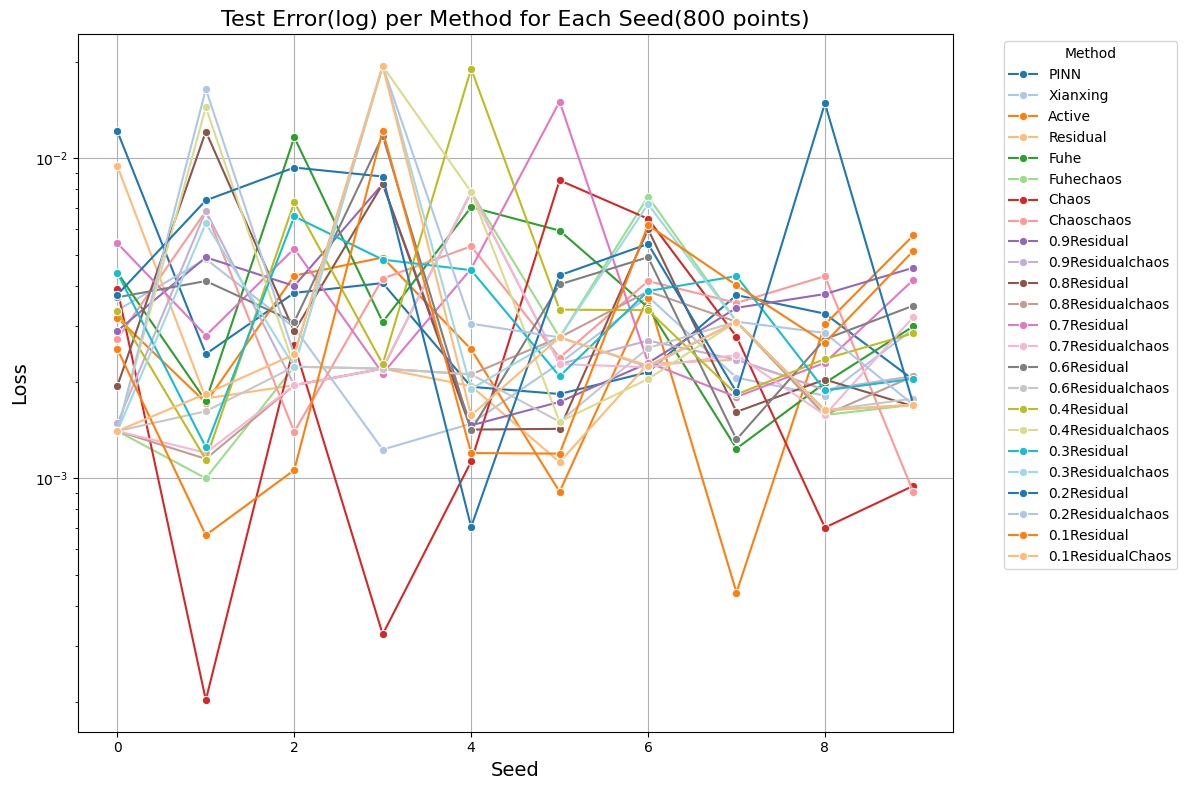

In [4]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')


# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签

plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

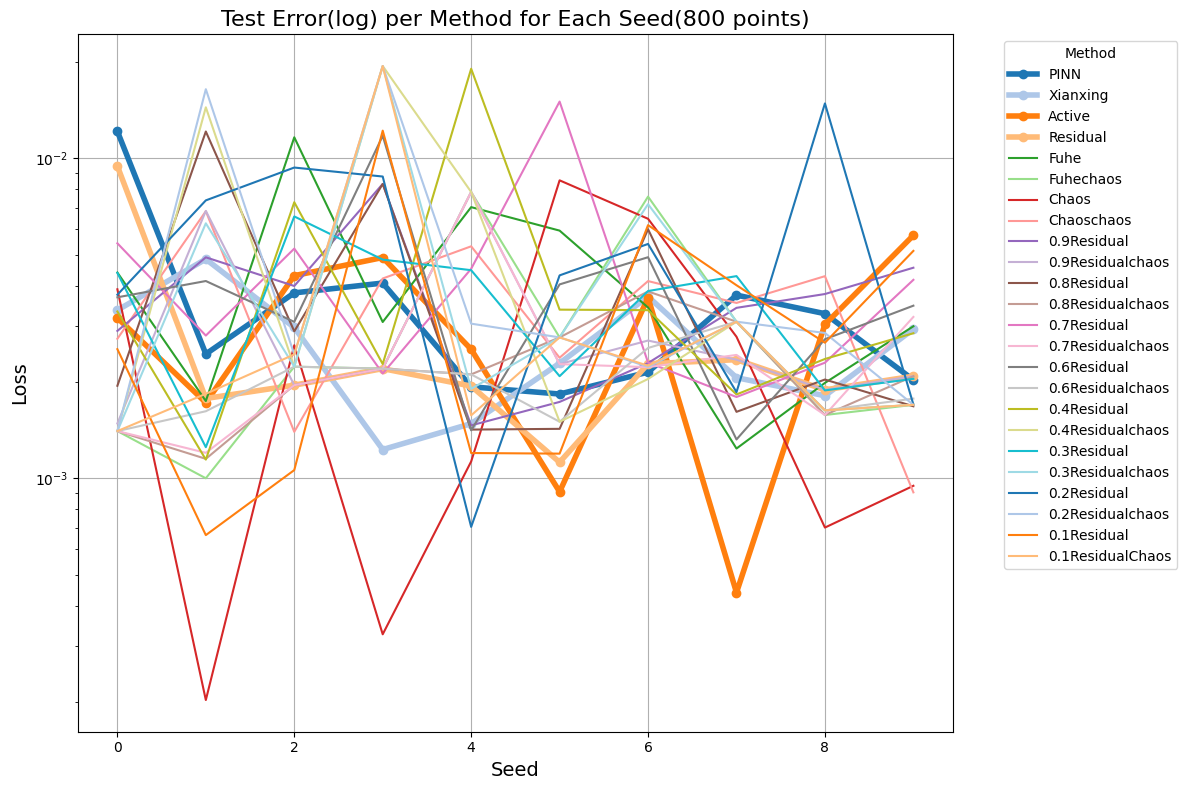

In [5]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active',"Xianxing","25000PINN","tongchengbenPINN","25000Xianxing","tongchengbenXianxing"]
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )

# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('Test Error(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\959944533.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\959944533.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


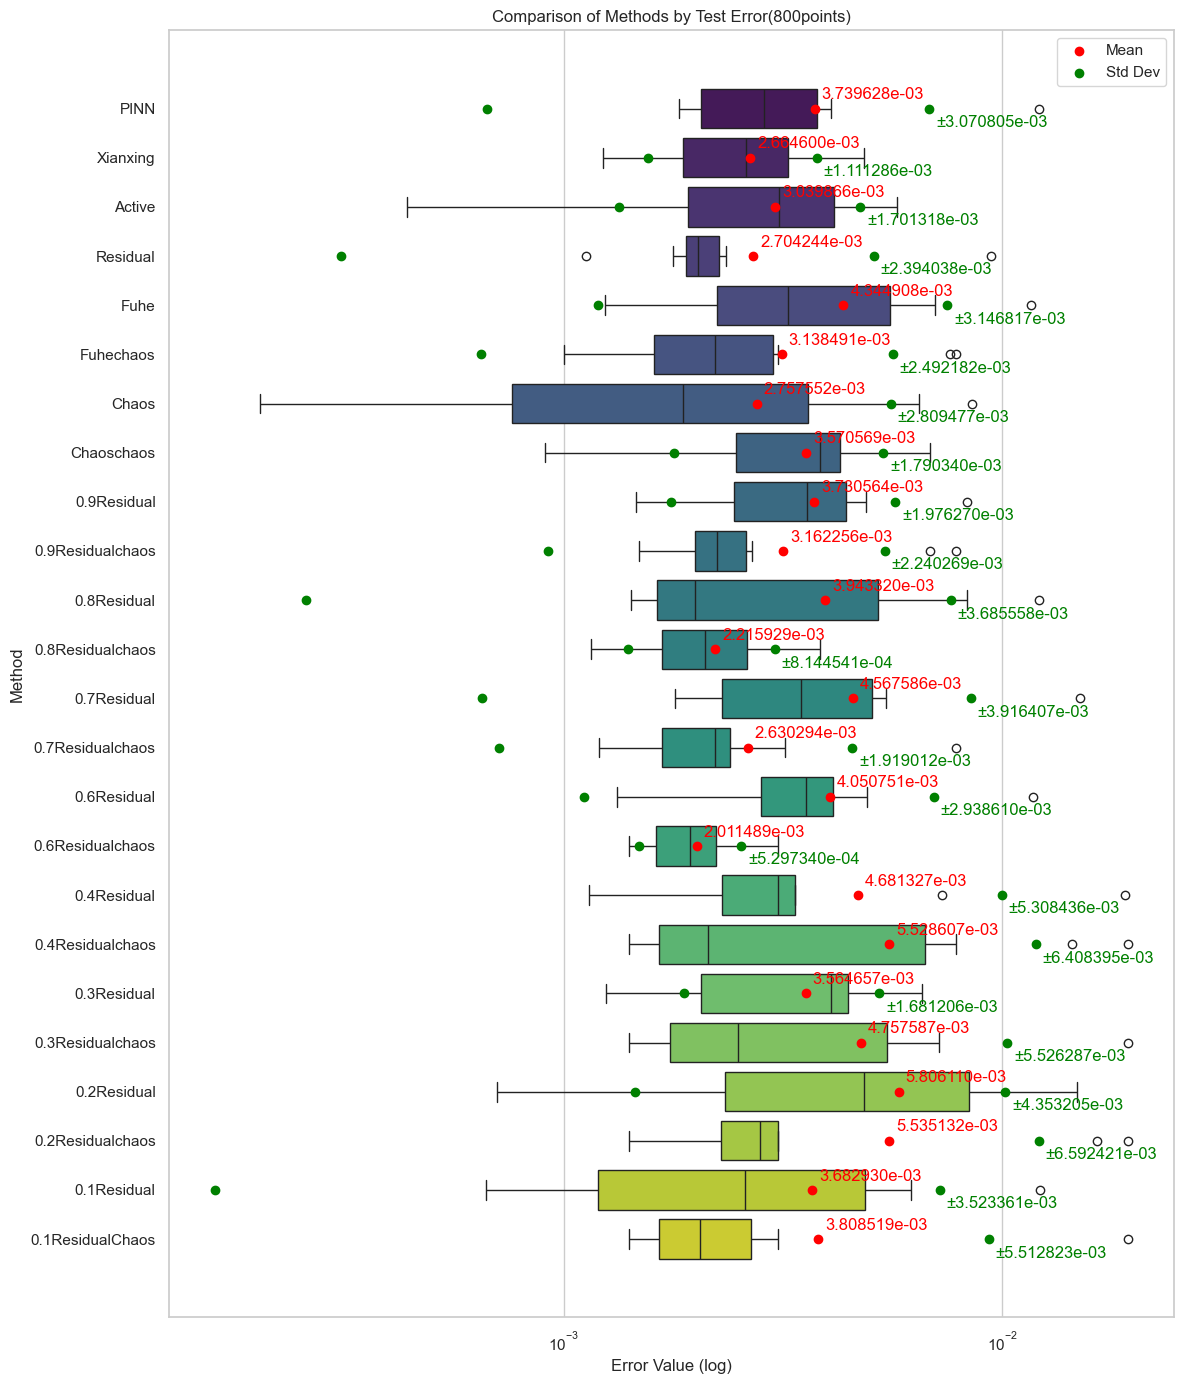

In [6]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 14))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [7]:
(1.992611e-03-2.011489e-03)/2.011489e-03

-0.009385087365628125

C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\592110665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\592110665.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


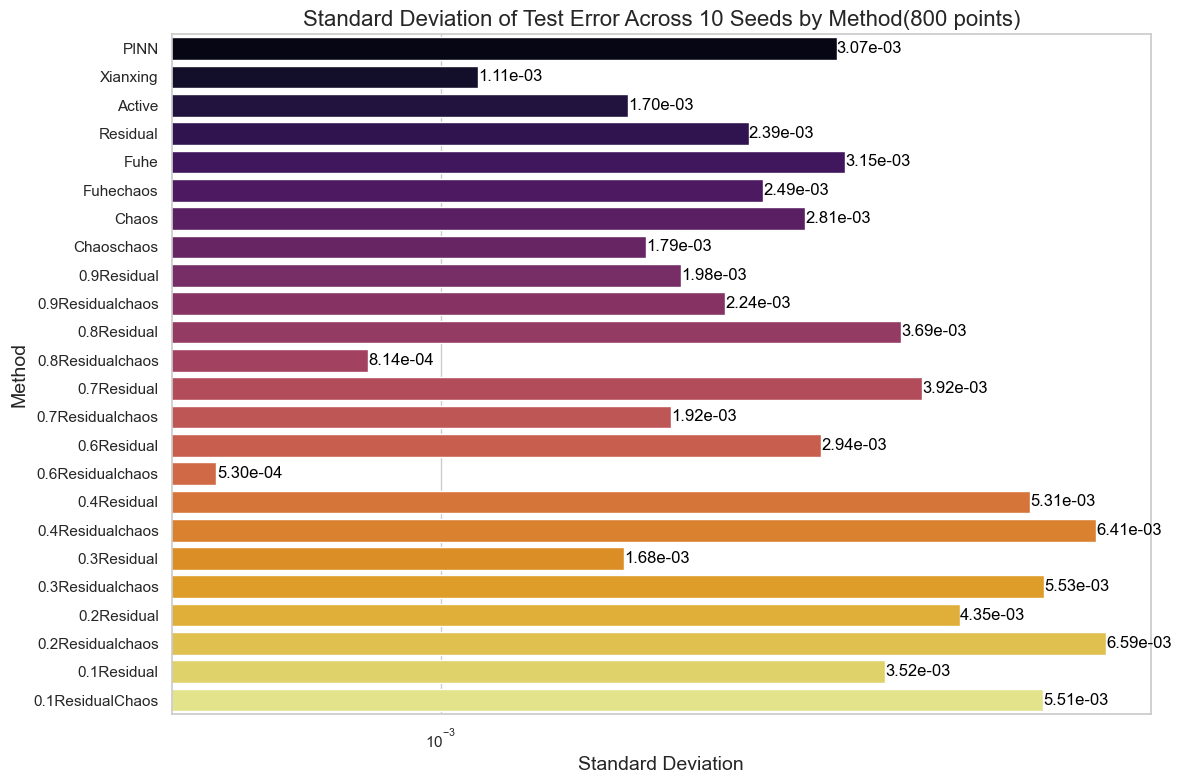

In [8]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of Test Error Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.000001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

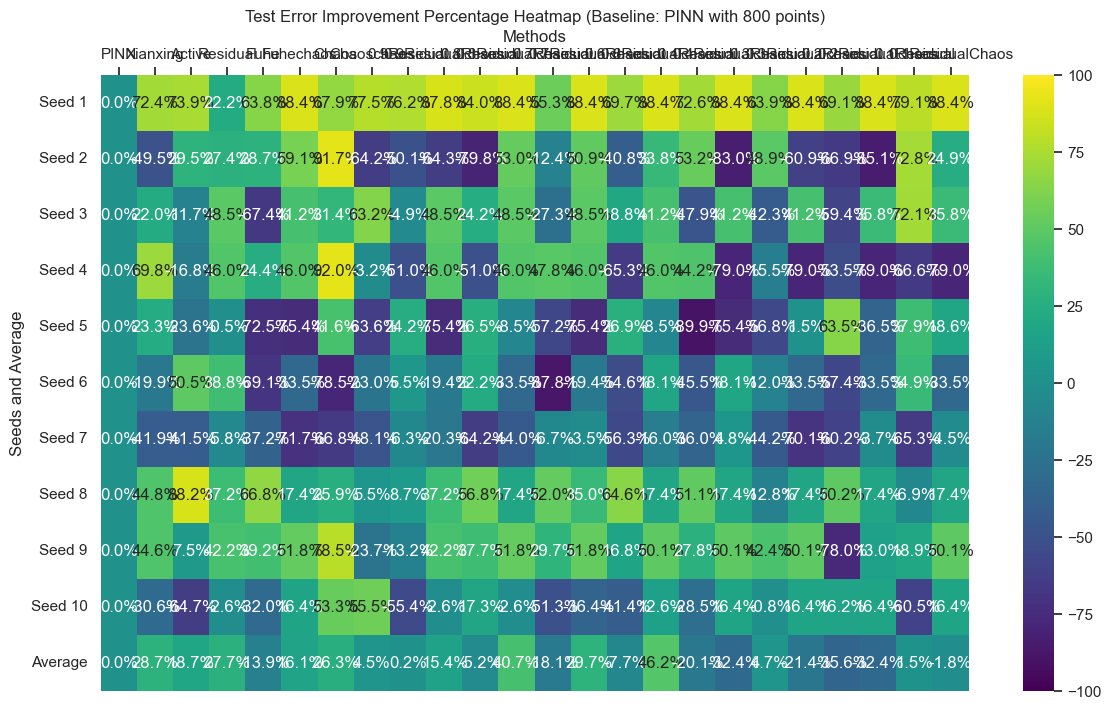

In [9]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



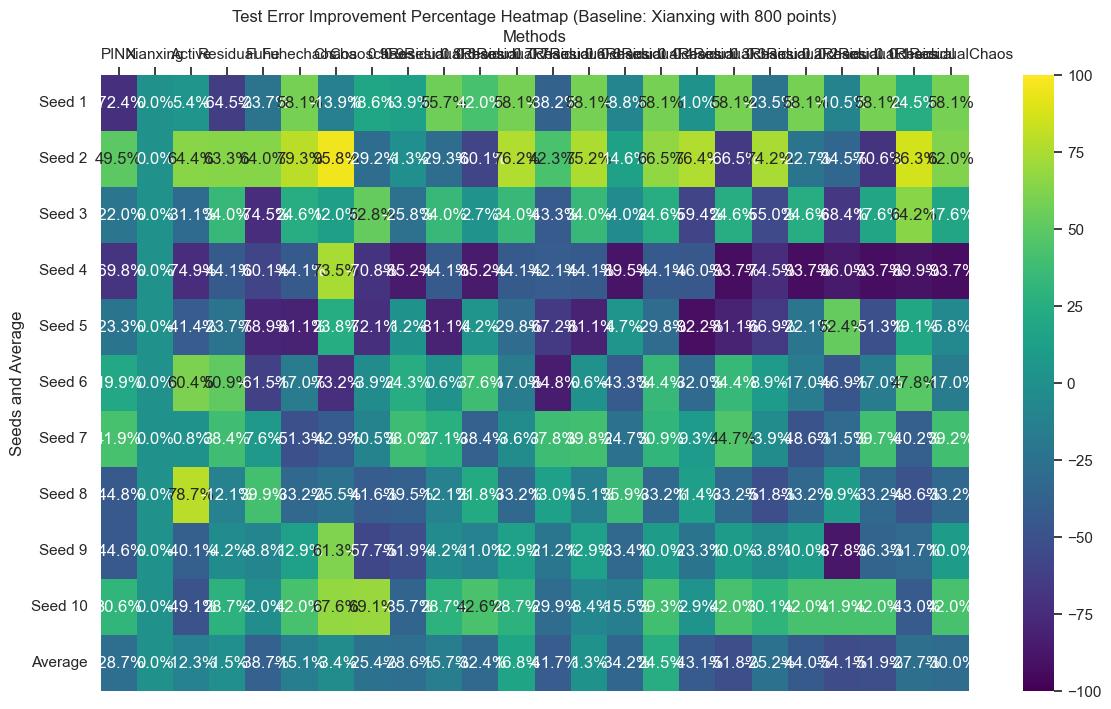

In [10]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



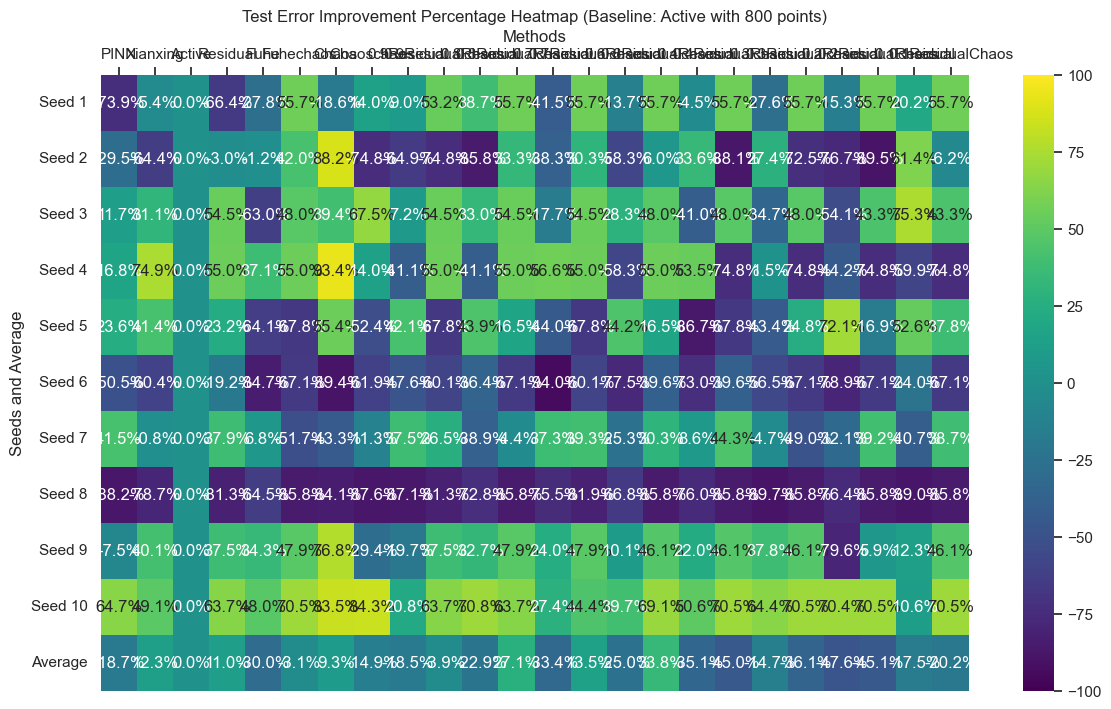

In [11]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



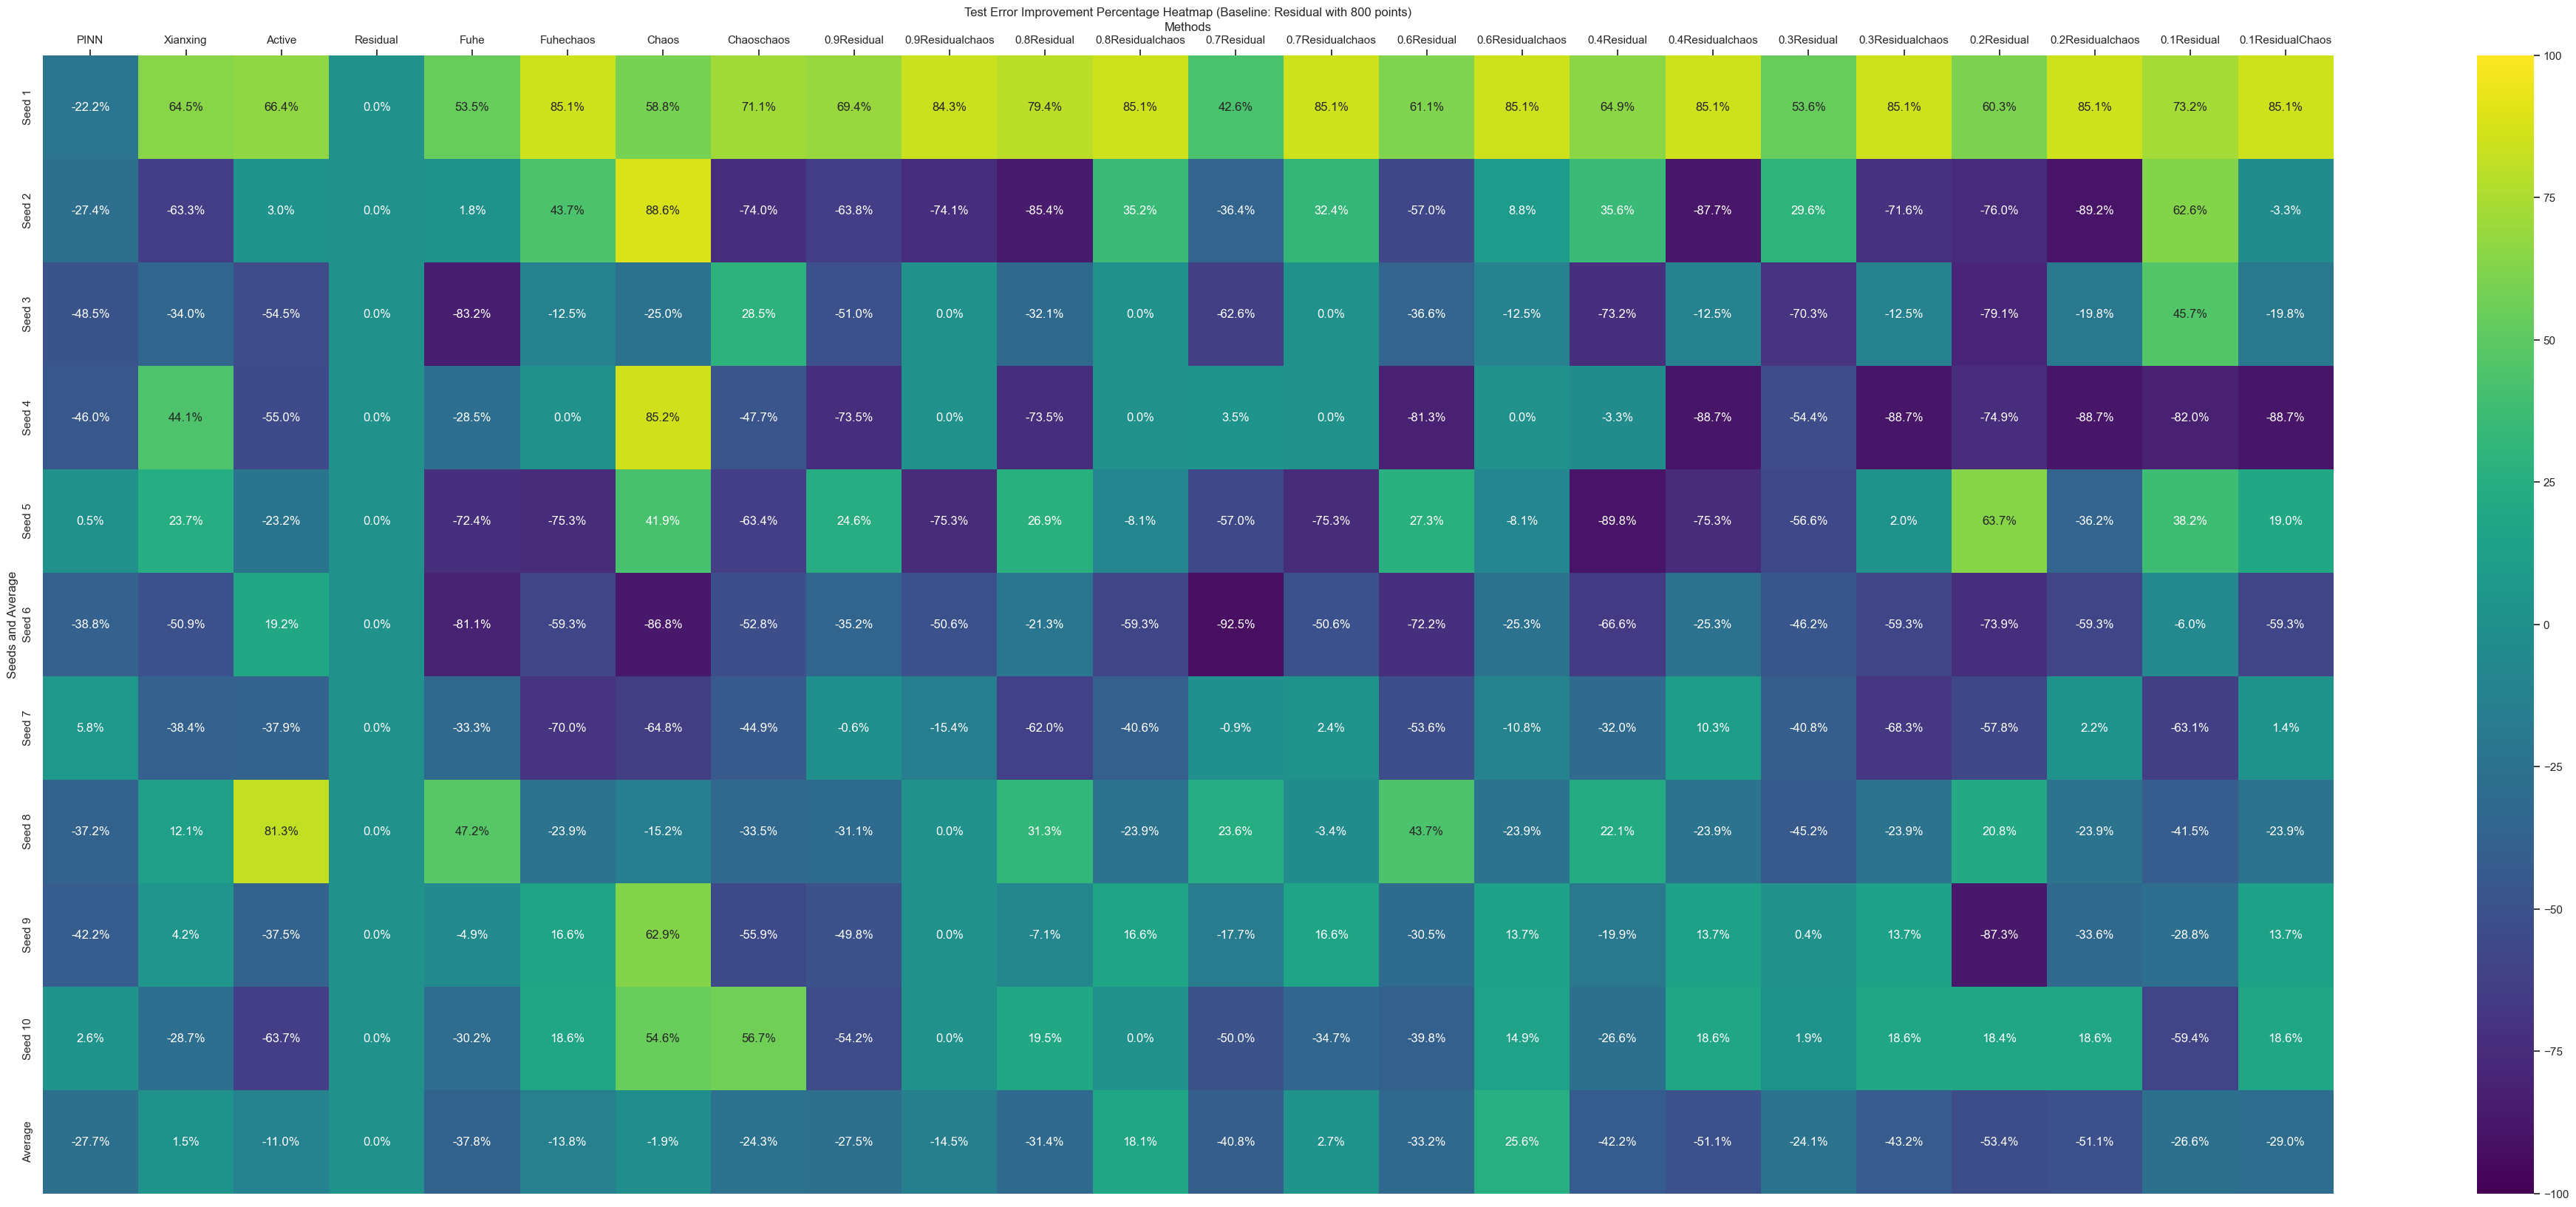

In [12]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(50, 20))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



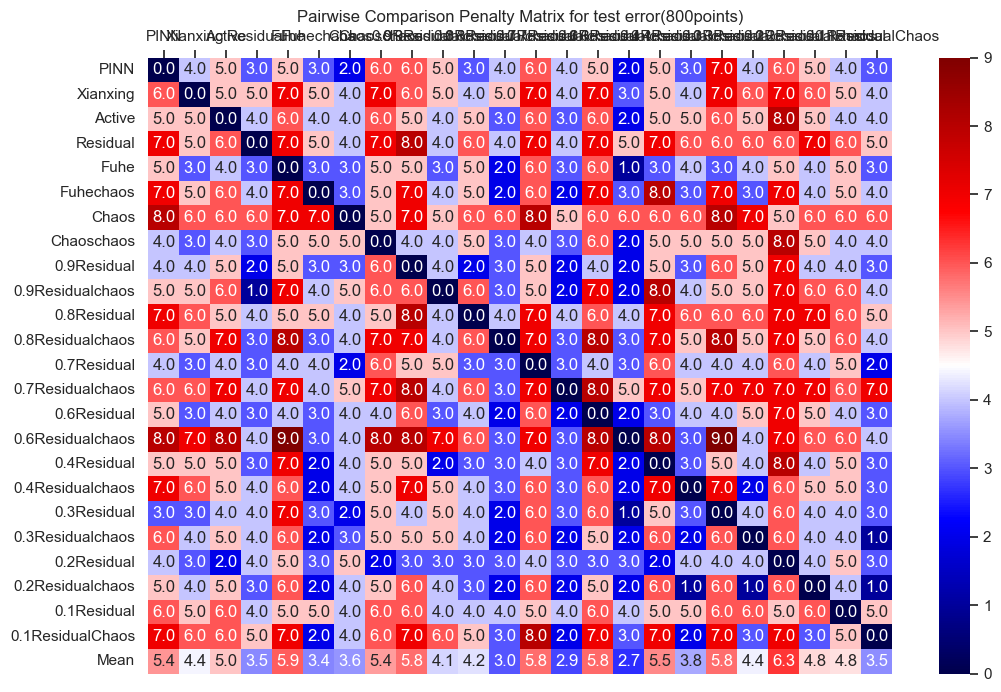

In [13]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [14]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MAE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [0.0010113535167429436, 0.00020815521292463277, 0.0004634077046170402, 0.00034487109009604864, 0.00016476846340609183, 0.0002653263587083962, 0.00024511849557796853, 0.0004070548220500301, 0.0002757350564959817, 0.00017877925177477917], 'Xianxing': [0.0003803891220506201, 0.0004485098641752755, 0.00030894884478713475, 0.00010945427547735179, 0.00023468044791139734, 0.00021653491208139953, 0.00037591956887970604, 0.00020362657267920375, 0.0002896524953625127, 0.0006228160275785302], 'Active': [0.0002727793466557132, 0.00015142488148081826, 0.0011341117053655367, 0.000406332512

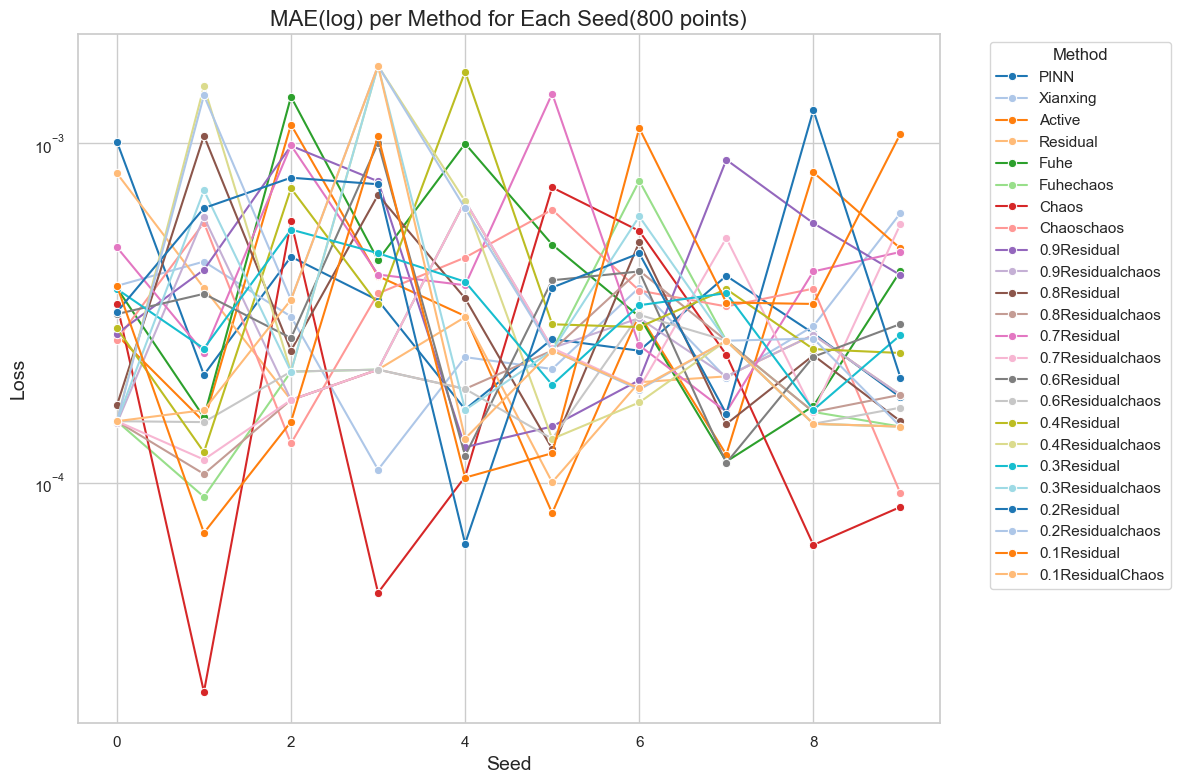

In [15]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)



# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')

# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

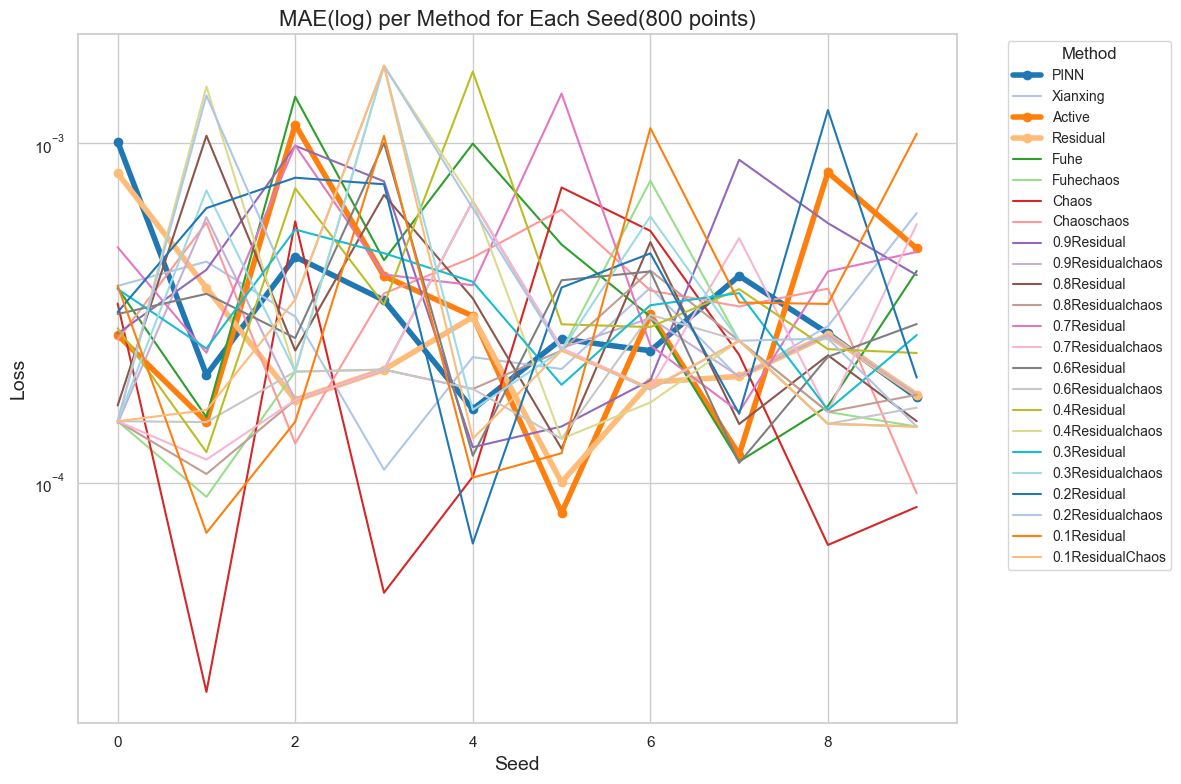

In [16]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MAE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\822122591.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\822122591.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


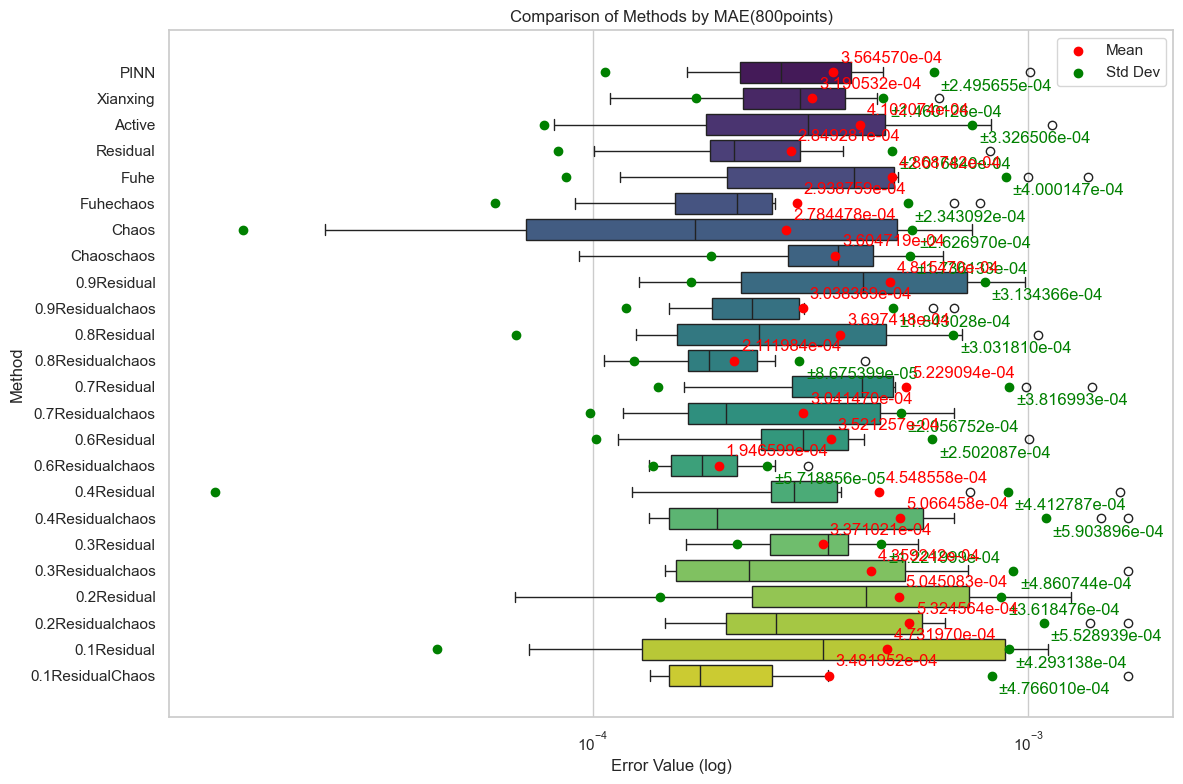

In [17]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\2556958130.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_df = dd.groupby('Method')['Values'].std().reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\2556958130.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


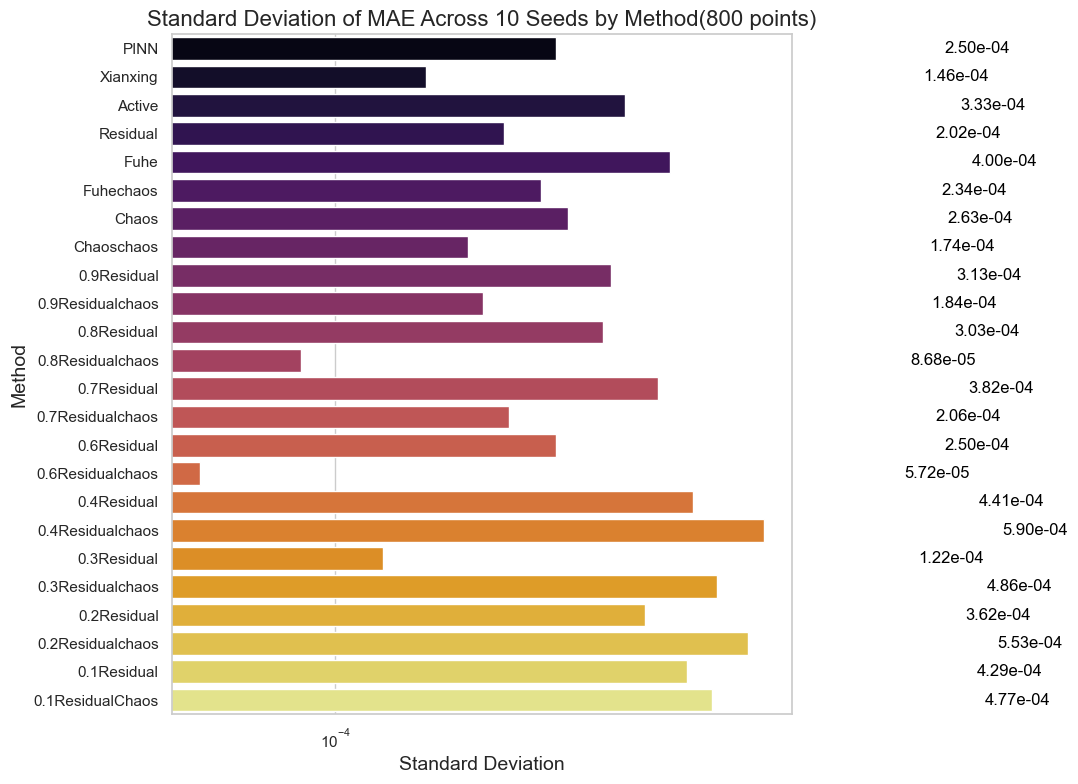

In [18]:
# 计算每种方法在10个seed下的标准差
std_df = dd.groupby('Method')['Values'].std().reset_index()
std_df.rename(columns={'Values': 'Std Dev'}, inplace=True)
# 创建图像
plt.figure(figsize=(12, 8))
# 使用 Seaborn 绘制标准差柱状图
sns.barplot(
    x='Std Dev',
    y='Method',
    data=std_df,
    palette="inferno",
    orient='h'
)

plt.xscale('log')

# 添加标题和轴标签
plt.title('Standard Deviation of MAE Across 10 Seeds by Method(800 points)', fontsize=16)
plt.xlabel('Standard Deviation', fontsize=14)
plt.ylabel('Method', fontsize=14)
# 显示标准差值
for index, row in std_df.iterrows():
    plt.text(
        row['Std Dev'] + 0.001,  # 偏移值用于使文字避开柱状图
        index,
        f'{row["Std Dev"]:.2e}',
        color='black',
        va='center',
        fontsize=12
    )
# 调整布局
plt.tight_layout()
# 显示图像
plt.show()

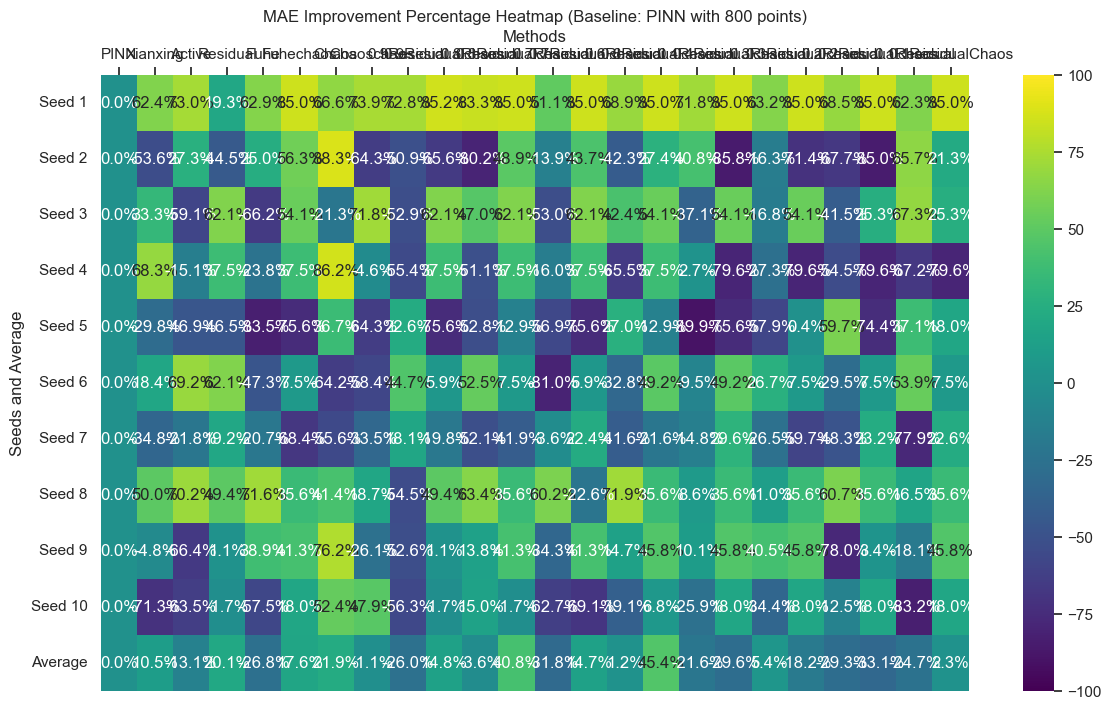

In [19]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



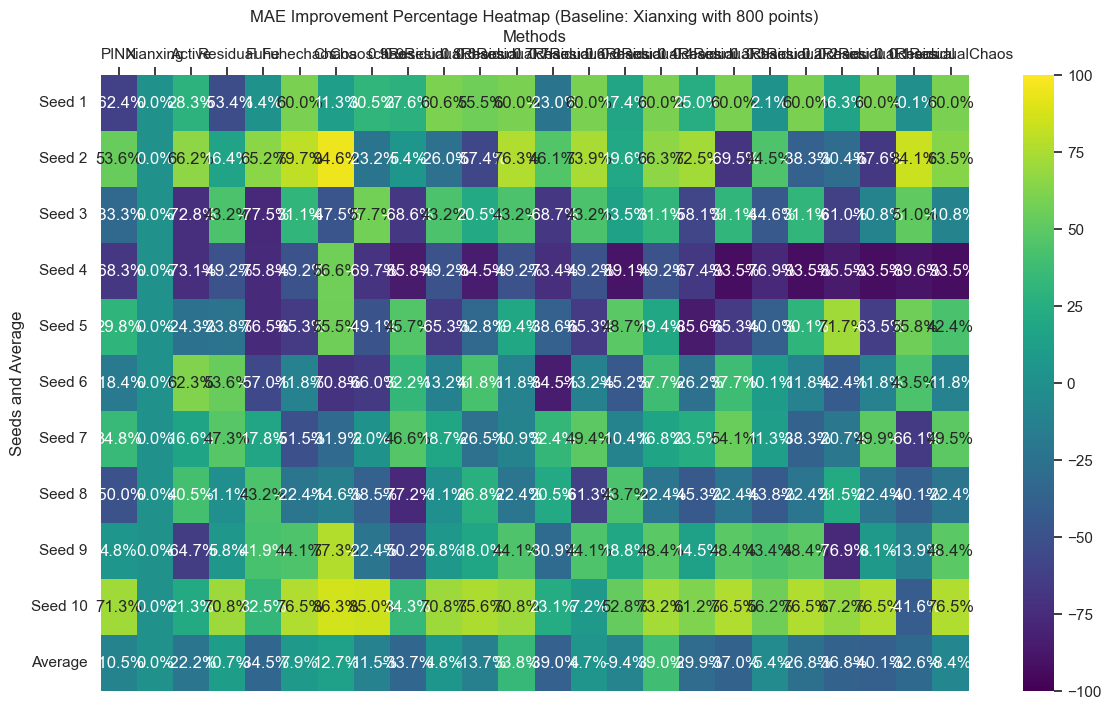

In [20]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



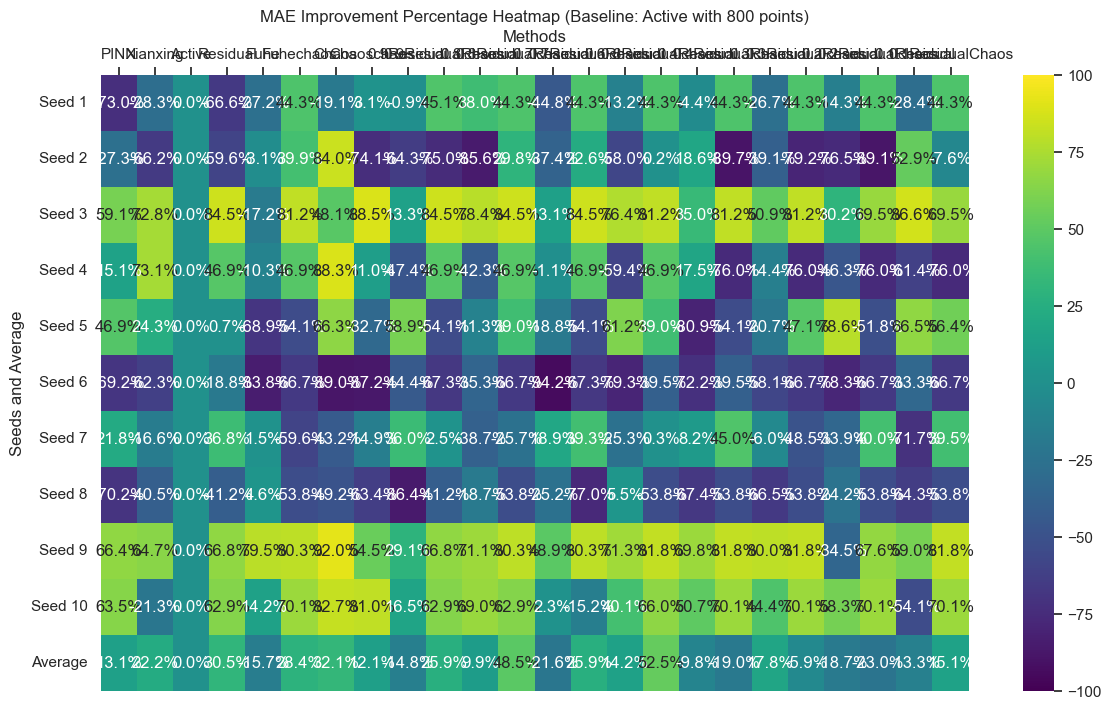

In [21]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



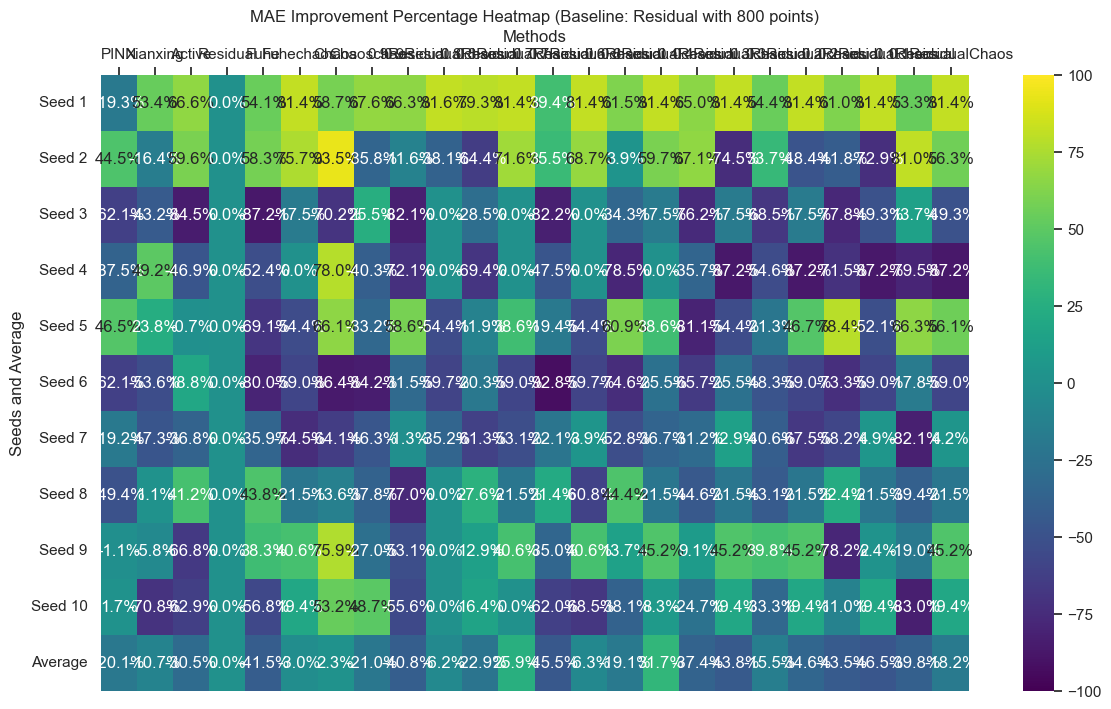

In [22]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



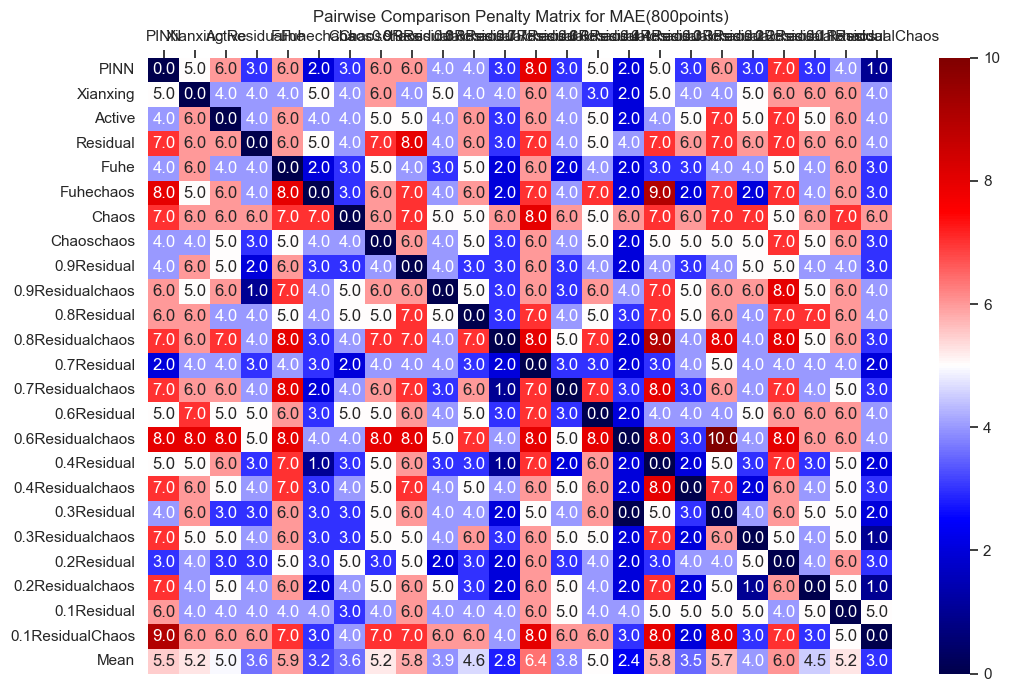

In [23]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [24]:
# 筛选出 Metric 为 "Error_u" 的数据
error_u_df = df[df["Metric"] == "MSE"]

# 转换为字典格式
loss_values = {row["Method"]: row["Values"] for _, row in error_u_df.iterrows()}

# 显示结果
methods = list(loss_values.keys())
seeds = range(len(next(iter(loss_values.values()))))

seeds = range(10)

print("Methods:", methods)
print("Seeds:", seeds)
print("Loss Values:", loss_values)

Methods: ['PINN', 'Xianxing', 'Active', 'Residual', 'Fuhe', 'Fuhechaos', 'Chaos', 'Chaoschaos', '0.9Residual', '0.9Residualchaos', '0.8Residual', '0.8Residualchaos', '0.7Residual', '0.7Residualchaos', '0.6Residual', '0.6Residualchaos', '0.4Residual', '0.4Residualchaos', '0.3Residual', '0.3Residualchaos', '0.2Residual', '0.2Residualchaos', '0.1Residual', '0.1ResidualChaos']
Seeds: range(0, 10)
Loss Values: {'PINN': [1.8008754401801412e-05, 7.3109334693104e-07, 1.7618968162820562e-06, 2.028616899532398e-06, 4.560134457348366e-07, 4.1111115726398856e-07, 5.640828622388152e-07, 1.7065599008793838e-06, 1.3064677342084793e-06, 5.041591969804143e-07], 'Xianxing': [1.3760259750613761e-06, 2.8637132103525737e-06, 1.070846703079021e-06, 1.849373048771606e-07, 2.682261192118011e-07, 6.408034154532763e-07, 1.6712515840300313e-06, 5.206920430243376e-07, 4.01174444990926e-07, 1.0470413221197485e-06], 'Active': [1.2303020139852856e-06, 3.633758791230327e-07, 2.253802555674988e-06, 2.9304021752464323e

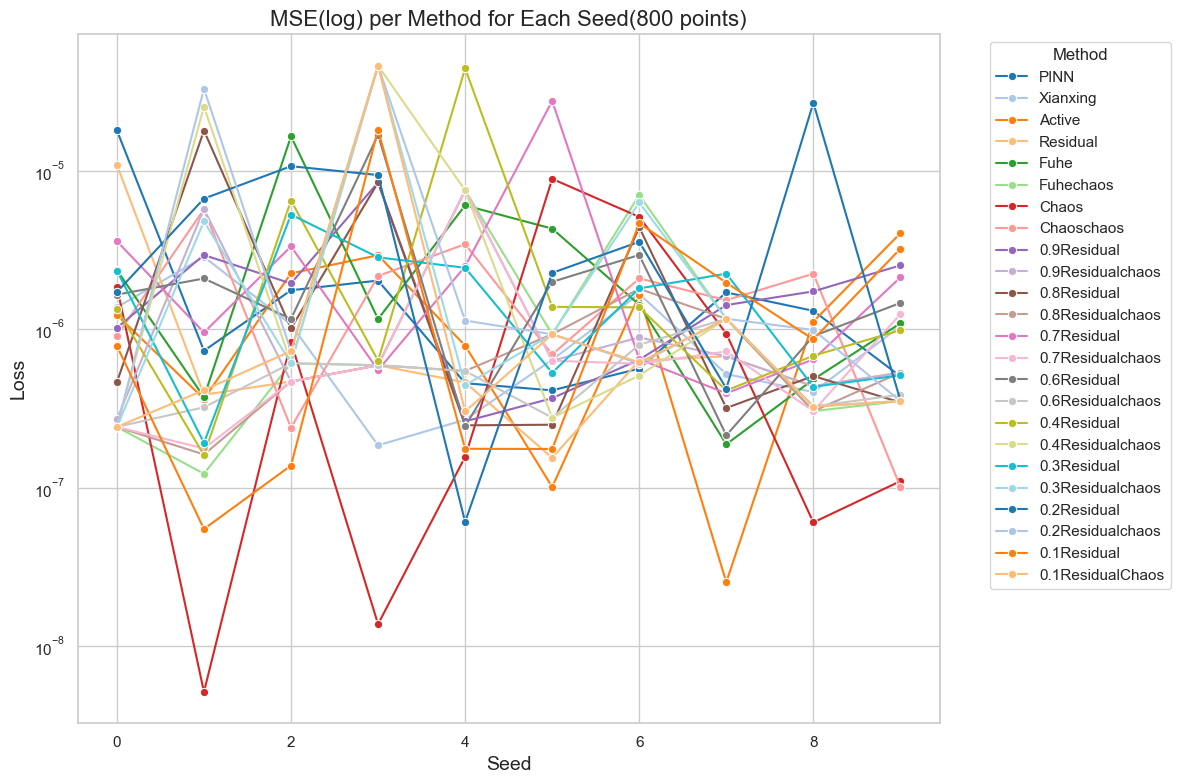

In [25]:
# 1. 转换数据为 DataFrame
data = []
for method, values in loss_values.items():
    for seed, value in enumerate(values):
        data.append({'Method': method, 'Seed': seed, 'Loss': value})

dd = pd.DataFrame(data)

# 确保方法按指定顺序排序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 2. 绘制折线图
plt.figure(figsize=(12, 8))
sns.lineplot(data=dd, x='Seed', y='Loss', hue='Method', palette='tab20', marker='o')



# 设置纵坐标为对数尺度
plt.yscale('log')

# 3. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# 4. 显示图形
plt.show()

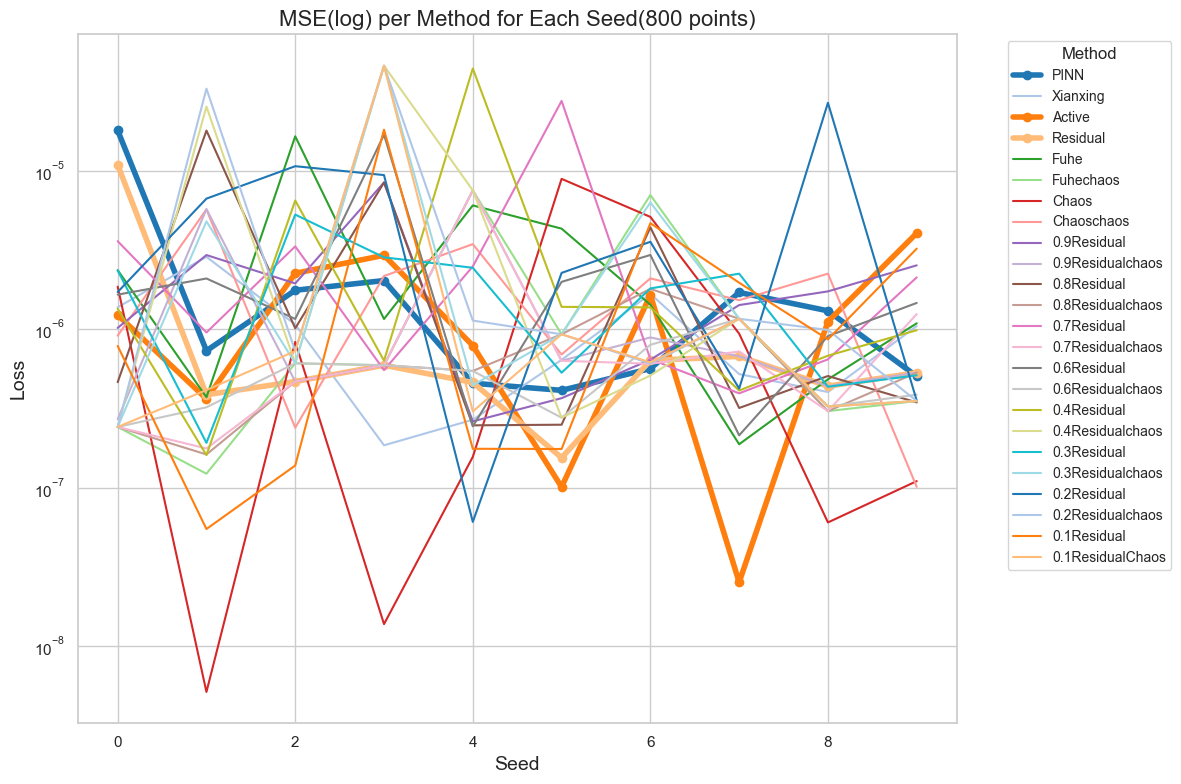

In [26]:
# 2. 设置颜色和线宽
highlight_methods = ['PINN', 'Residual', 'Active']
colors = sns.color_palette("tab20", len(methods))  # 使用 Seaborn 默认调色板
color_mapping = {method: colors[i] for i, method in enumerate(methods)}

linewidths = {method: 4 if method in highlight_methods else 1.5 for method in methods}

# 3. 绘制图形
plt.figure(figsize=(12, 8))

for method in methods:
    subset = dd[dd['Method'] == method]
    plt.plot(
        subset['Seed'], subset['Loss'],
        label=method,
        color=color_mapping[method],
        linewidth=linewidths[method],
        marker='o' if method in highlight_methods else None,
    )


# 设置纵坐标为对数尺度
plt.yscale('log')

# 4. 设置图形标题和标签
plt.title('MSE(log) per Method for Each Seed(800 points)', fontsize=16)
plt.xlabel('Seed', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()

# 5. 显示图形
plt.show()

C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\2163168095.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()
C:\Users\cheny\AppData\Local\Temp\ipykernel_42900\2163168095.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)


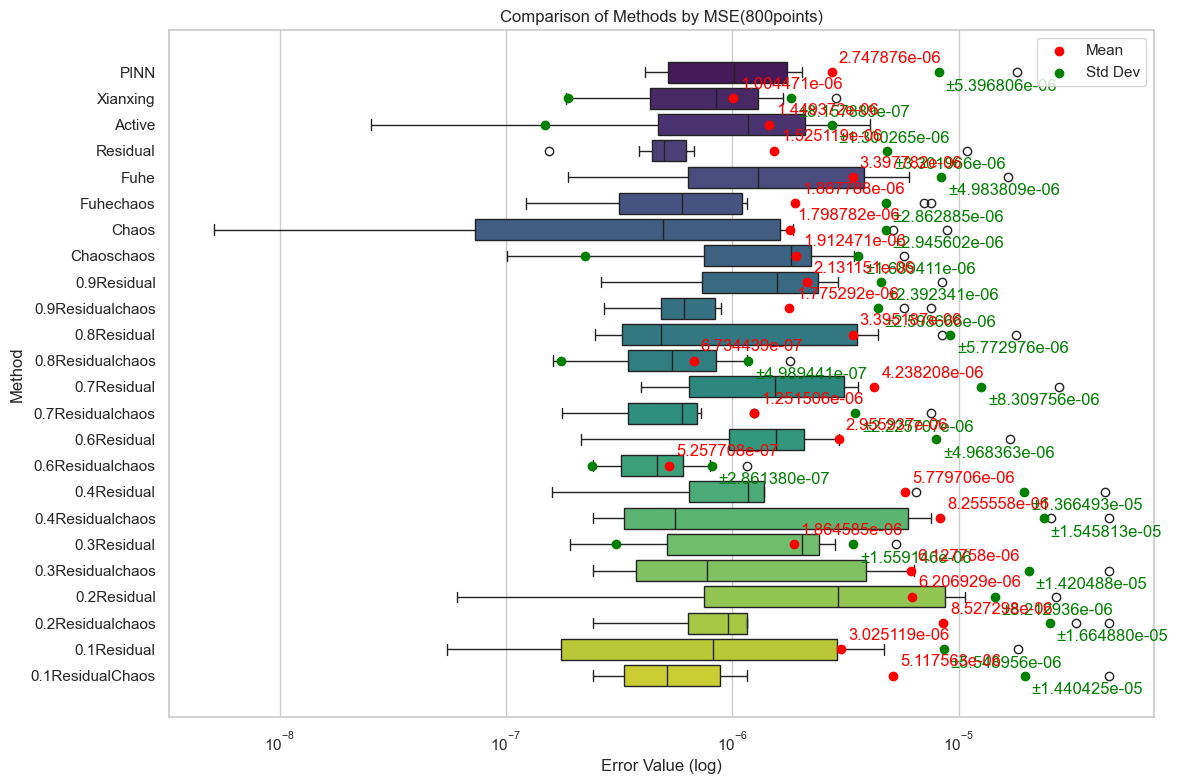

In [27]:
# 创建用于绘图的 DataFrame
data = []
for method, values in loss_values.items():
    for value in values:
        data.append({'Method': method, 'Values': value})


dd = pd.DataFrame(data)

# 设置 Seaborn 样式
sns.set(style="whitegrid")

# 将原始方法顺序设置为分类顺序
dd['Method'] = pd.Categorical(dd['Method'], categories=methods, ordered=True)

# 计算均值和标准差时保持顺序
mean_std_df = dd.groupby('Method')['Values'].agg(['mean', 'std']).reset_index()

# 创建图像
fig, ax = plt.subplots(figsize=(12, 8))

# 使用 Seaborn 绘制箱线图
palette = sns.color_palette("viridis", len(mean_std_df))
sns.boxplot(x='Values', y='Method', data=dd, ax=ax, palette=palette)

# 设置对数刻度
ax.set_xscale('log')

# 标注均值和标准差
for index, row in mean_std_df.iterrows():
    y_pos = list(mean_std_df['Method']).index(row['Method'])
    # 绘制均值为红点
    ax.scatter(row['mean'], y_pos, color='red', zorder=5, label="Mean" if index == 0 else "")
    # 绘制方差为绿点
    ax.scatter(row['mean'] + row['std'], y_pos, color='green', zorder=5, label="Std Dev" if index == 0 else "")
    ax.scatter(row['mean'] - row['std'], y_pos, color='green', zorder=5)
    # 标注均值和标准差值
    ax.annotate(f'{row["mean"]:.6e}', 
                xy=(row['mean'], y_pos), 
                xytext=(5, 10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='red')
    ax.annotate(f'±{row["std"]:.6e}', 
                xy=(row['mean'] + row['std'], y_pos), 
                xytext=(5, -10), 
                textcoords='offset points',
                va='center', 
                ha='left',
                color='green')

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(800points)')
ax.set_xlabel('Error Value (log)')
ax.set_ylabel('Method')

# 添加图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], loc='upper right')

# 调整图像布局
plt.tight_layout()

# 显示图像
plt.show()

In [28]:
def rmse_to_mse(rmse):
    """
    将 RMSE 转换为 MSE。
    
    参数:
        rmse (float 或 list 或 numpy array): 均方根误差值
    
    返回:
        mse: 对应的均方误差值
    """
    import numpy as np
    rmse = np.array(rmse)
    mse = rmse ** 2
    return mse

rmse_to_mse(0.0003632)
rmse_to_mse([0.0003632, 0.0131793])

array([1.31914240e-07, 1.73693948e-04])

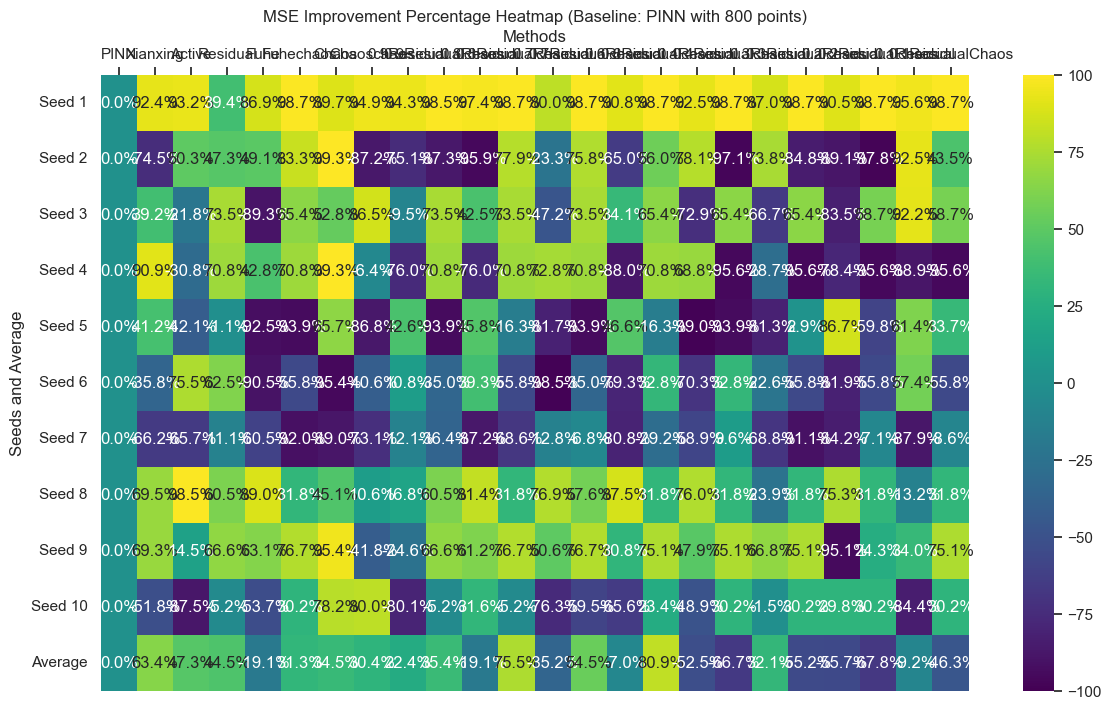

In [29]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



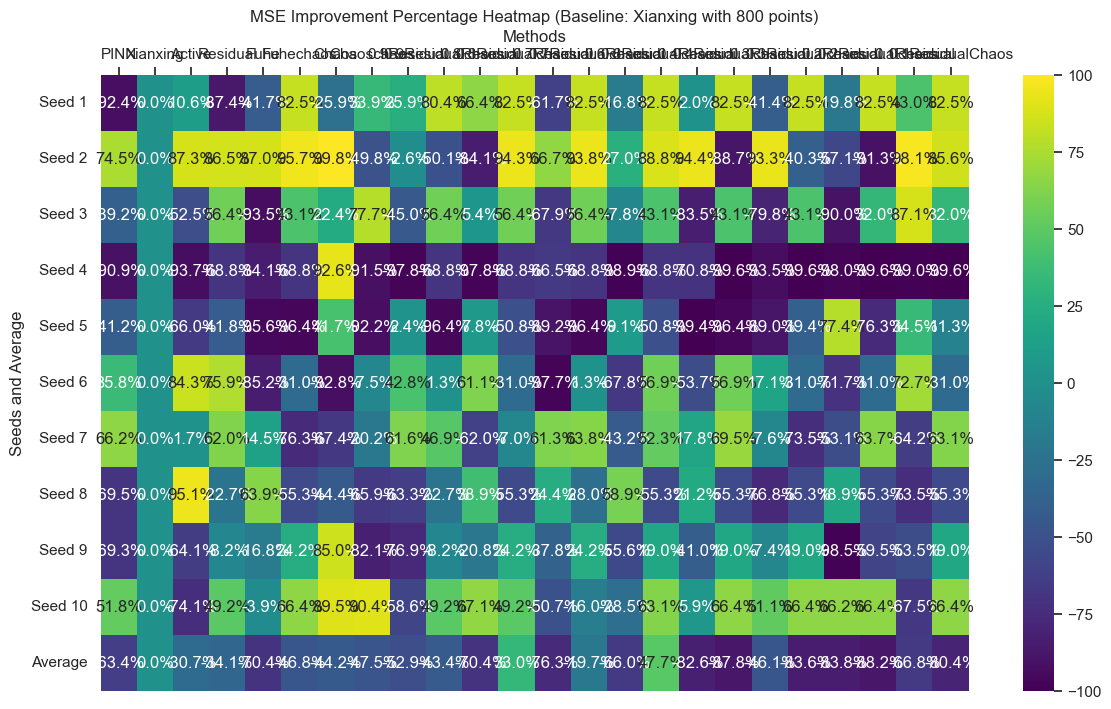

In [30]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



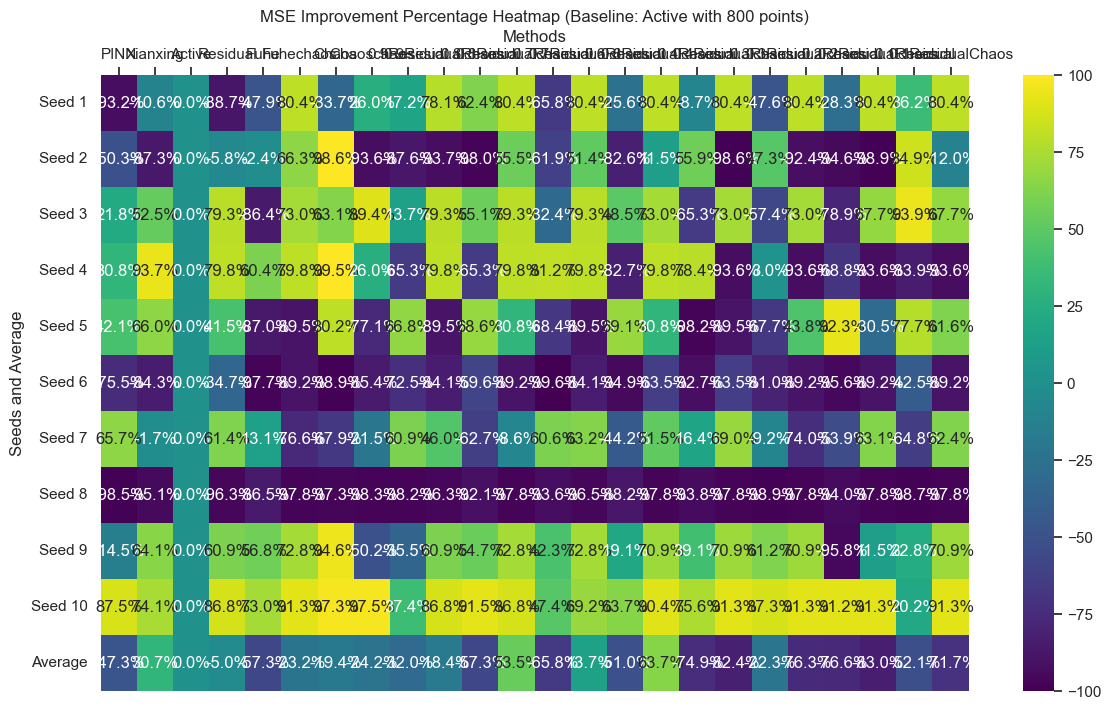

In [31]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



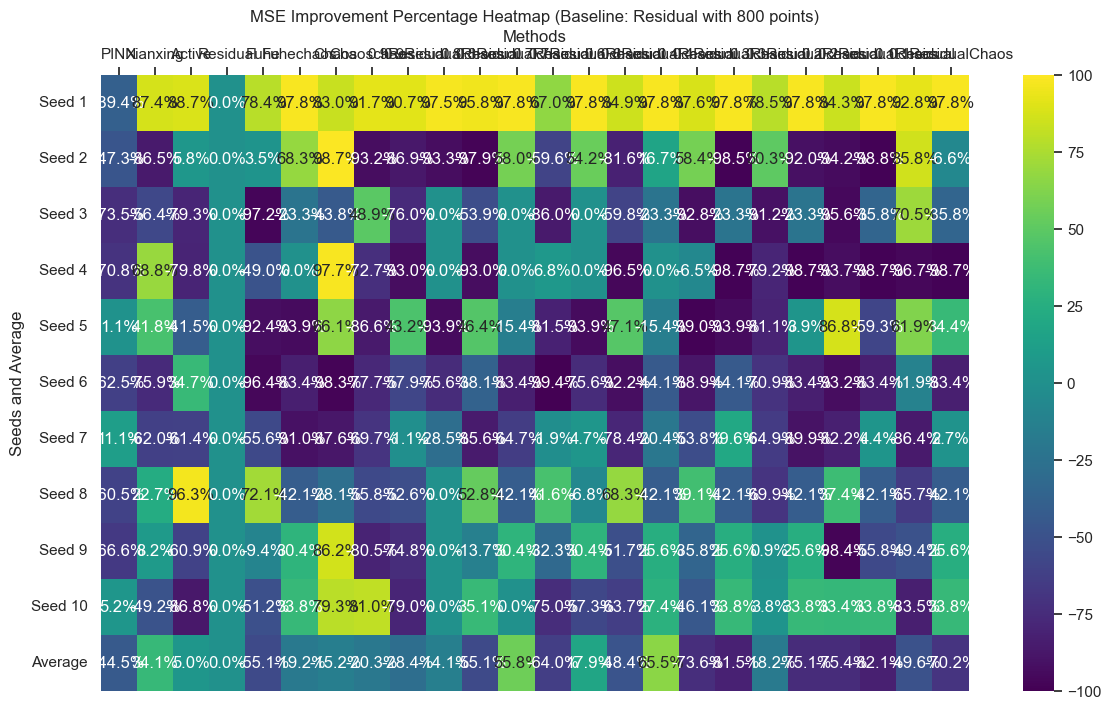

In [32]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 800 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



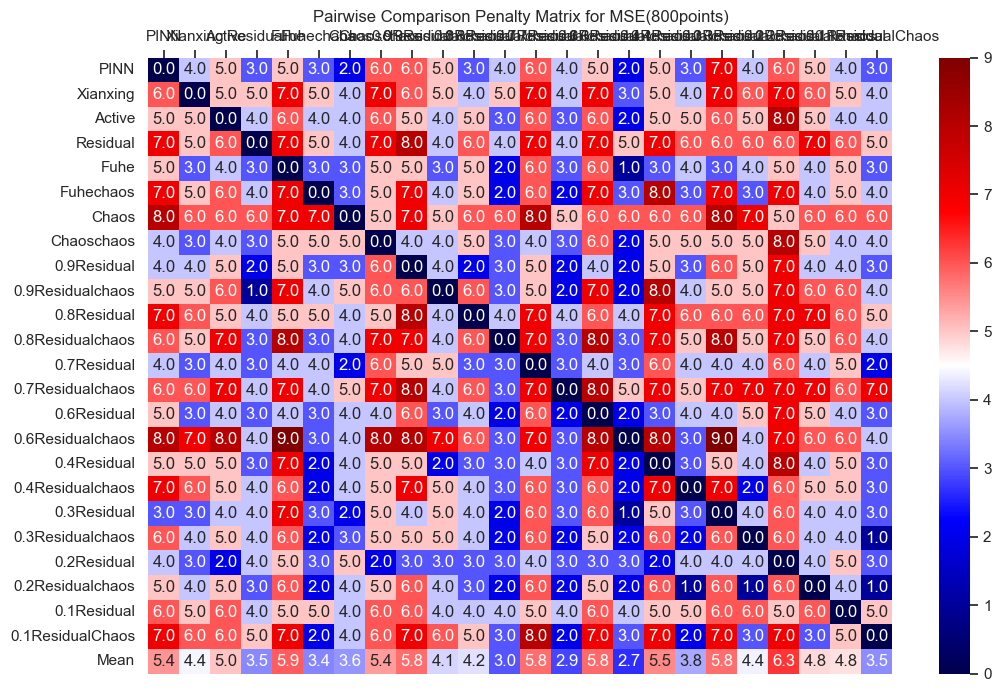

In [33]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(800points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


In [34]:
np.sqrt(2.889226e-06)

0.0016997723376970223